In [1]:
from traffico_ticino import monte_verita_simulation
from traffico_ticino import summary
from traffico_ticino import load_dataset
import pandas as pd
import matplotlib.pyplot as plt  
import seaborn as sns  
import statsmodels.api as sm  
import numpy as np
from pathlib import Path


In [2]:
# Carica i dataset
df_traffic_as = load_dataset("AS_media", "media")  # Carica dalla cartella 'media'
df_traffic_sp = load_dataset("SP_media", "media")  # Carica dalla cartella 'media'

# Controlla i primi valori
print(df_traffic_as.head())
print(df_traffic_sp.head())

df_traffic = load_dataset("traffic_media", "media")

# Mostra i dati uniti
print(df_traffic.head())


Percorso generato: c:\Users\arian\Desktop\pacchetto_python\traffico_ticino\data\media\AS_media.csv
Percorso generato: c:\Users\arian\Desktop\pacchetto_python\traffico_ticino\data\media\SP_media.csv
         date  media_highway
0  2020-01-07        13020.0
1  2020-01-14        19379.0
2  2020-01-21        19684.0
3  2020-01-28        19781.0
4  2020-02-04        19597.0
         date  media_main_roads
0  2020-01-07           12620.0
1  2020-01-14           17584.0
2  2020-01-21           17181.0
3  2020-01-28           16971.0
4  2020-02-04           16634.0
Percorso generato: c:\Users\arian\Desktop\pacchetto_python\traffico_ticino\data\media\traffic_media.csv
                  date  Highways  Main Roads
0  07.01.2020 00:00:00   13020.0     12620.0
1  14.01.2020 00:00:00   19379.0     17584.0
2  21.01.2020 00:00:00   19684.0     17181.0
3  28.01.2020 00:00:00   19781.0     16971.0
4  04.02.2020 00:00:00   19597.0     16634.0


In [3]:
custom_dir = Path ("graphics")

# Crea la directory (e le parent directories se mancano)
custom_dir.mkdir(parents=True, exist_ok=True)

In [4]:
df_air = load_dataset("air", "media")
print(df_air.head())

Percorso generato: c:\Users\arian\Desktop\pacchetto_python\traffico_ticino\data\media\air.csv
         date  media O3  media PM10  media NO2
0  2020-01-07      50.0        21.0       38.0
1  2020-01-14      46.0        25.0       45.0
2  2020-01-21      54.0        24.0       41.0
3  2020-01-28      46.0        35.0       48.0
4  2020-02-04      55.0        18.0       34.0


In [5]:
df_combined = pd.DataFrame({
    'date': df_traffic['date'],               # Data, assicurati che 'date' sia presente nel tuo dataset
    'traffic_highways': df_traffic['Highways'],   # Traffico autostrade
    'traffic_main_roads': df_traffic['Main Roads'],  # Traffico strade principali
    'O3': df_air['media O3'],                          # Media di O3
    'NO2': df_air['media NO2'],                        # Media di NO2
    'PM10': df_air['media PM10']                       # Media di PM10
})

# Verifica il nuovo DataFrame
print(df_combined.head(28))

                   date  traffic_highways  traffic_main_roads     O3   NO2  \
0   07.01.2020 00:00:00           13020.0             12620.0   50.0  38.0   
1   14.01.2020 00:00:00           19379.0             17584.0   46.0  45.0   
2   21.01.2020 00:00:00           19684.0             17181.0   54.0  41.0   
3   28.01.2020 00:00:00           19781.0             16971.0   46.0  48.0   
4   04.02.2020 00:00:00           19597.0             16634.0   55.0  34.0   
5   11.02.2020 00:00:00           19199.0             16782.0   76.0  34.0   
6   18.02.2020 00:00:00           19570.0             16754.0   72.0  31.0   
7   25.02.2020 00:00:00           18950.0             16359.0   82.0  35.0   
8   03.03.2020 00:00:00           17372.0             15316.0   75.0  26.0   
9   10.03.2020 00:00:00           17169.0             16177.0   87.0  23.0   
10  17.03.2020 00:00:00           10592.0             12435.0   81.0  22.0   
11  24.03.2020 00:00:00            5653.0              6724.0  1

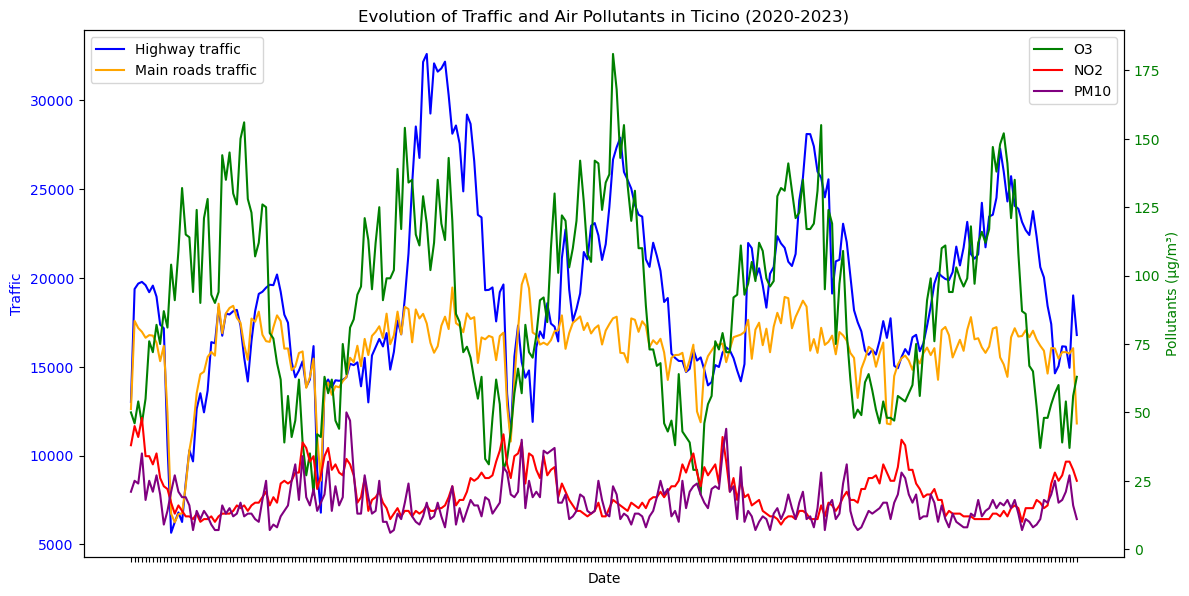

 Grafich saved in: graphics\Evolution of Traffic and Air Pollutants in Ticino (2020-2023).png


In [6]:
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plotta il traffico sulle autostrade con la prima scala y
ax1.plot(df_combined['date'], df_combined['traffic_highways'], label='Highway traffic', color='blue')
ax1.plot(df_combined['date'], df_combined['traffic_main_roads'], label='Main roads traffic', color='orange')

ax1.set_xlabel("Date")
ax1.set_ylabel("Traffic", color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Crea un secondo asse y per gli inquinanti
ax2 = ax1.twinx()

# Plotta gli inquinanti con la seconda scala y
ax2.plot(df_combined['date'], df_combined['O3'], label='O3', color='green')
ax2.plot(df_combined['date'], df_combined['NO2'], label='NO2', color='red')
ax2.plot(df_combined['date'], df_combined['PM10'], label='PM10', color='purple')

ax2.set_ylabel("Pollutants (µg/m³)", color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Legenda combinata
fig.tight_layout()  
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
ax2.set_xticklabels([]) 
plt.title("Evolution of Traffic and Air Pollutants in Ticino (2020-2023)")
output_path = custom_dir / "Evolution of Traffic and Air Pollutants in Ticino (2020-2023).png"

plt.savefig(output_path,dpi=300, bbox_inches='tight')
plt.show()
print(f" Grafich saved in: {output_path}")




In [7]:
# Carica i dati per Airolo (traffico e inquinamento)
df_airolo_traffic = load_dataset("Airolo_traffic_only", "traffic_only", stazione_singola=True)
df_airolo_pollution = load_dataset("Airolo_pollution_noO3", "pollution_noO3", stazione_singola=True)
print(df_airolo_pollution.head())
print(df_airolo_traffic.head())

# Unisci i dati di traffico e inquinamento in un DataFrame
df_airolo_combined = pd.DataFrame({
    'date': df_airolo_traffic['date'],          # Data
    'traffic': df_airolo_traffic['Gottardo traffico mensile 2020-2024'],  # Traffico autostrade
   'NOx': df_airolo_pollution['NOx Airolo mensili 2020-24'],          # Inquinante NOx
    'NO': df_airolo_pollution['No Airolo mensili 2020-24'],            # Inquinante NO
    'NO2': df_airolo_pollution['NO2 Airolo mensili 2020-24'],          # Inquinante NO2
    'PM10': df_airolo_pollution['PM10 Airolo mensili 2020-24'],        # Inquinante PM10
    'PM2.5': df_airolo_pollution['PM 2.5 Airolo mensili 2020-24']       # Inquinante PM2.5
})

# Assicurati che la colonna 'date' sia in formato datetime
df_airolo_combined['date'] = pd.to_datetime(df_airolo_combined['date'])

# Verifica i primi valori
print(df_airolo_combined.head(20))


Percorso generato: c:\Users\arian\Desktop\pacchetto_python\traffico_ticino\data\stazioni singole\traffic_only\Airolo_traffic_only.csv
Percorso generato: c:\Users\arian\Desktop\pacchetto_python\traffico_ticino\data\stazioni singole\pollution_noO3\Airolo_pollution_noO3.csv
         date  No Airolo mensili 2020-24  NO2 Airolo mensili 2020-24  \
0  2020-01-15                        9.0                        32.0   
1  2020-02-15                        5.0                        22.0   
2  2020-03-15                        2.0                        11.0   
3  2020-04-15                        1.0                         7.0   
4  2020-05-15                        1.0                         7.0   

   NOx Airolo mensili 2020-24  PM 2.5 Airolo mensili 2020-24  \
0                        24.0                            8.0   
1                        15.0                            5.0   
2                         7.0                            6.0   
3                         4.0          

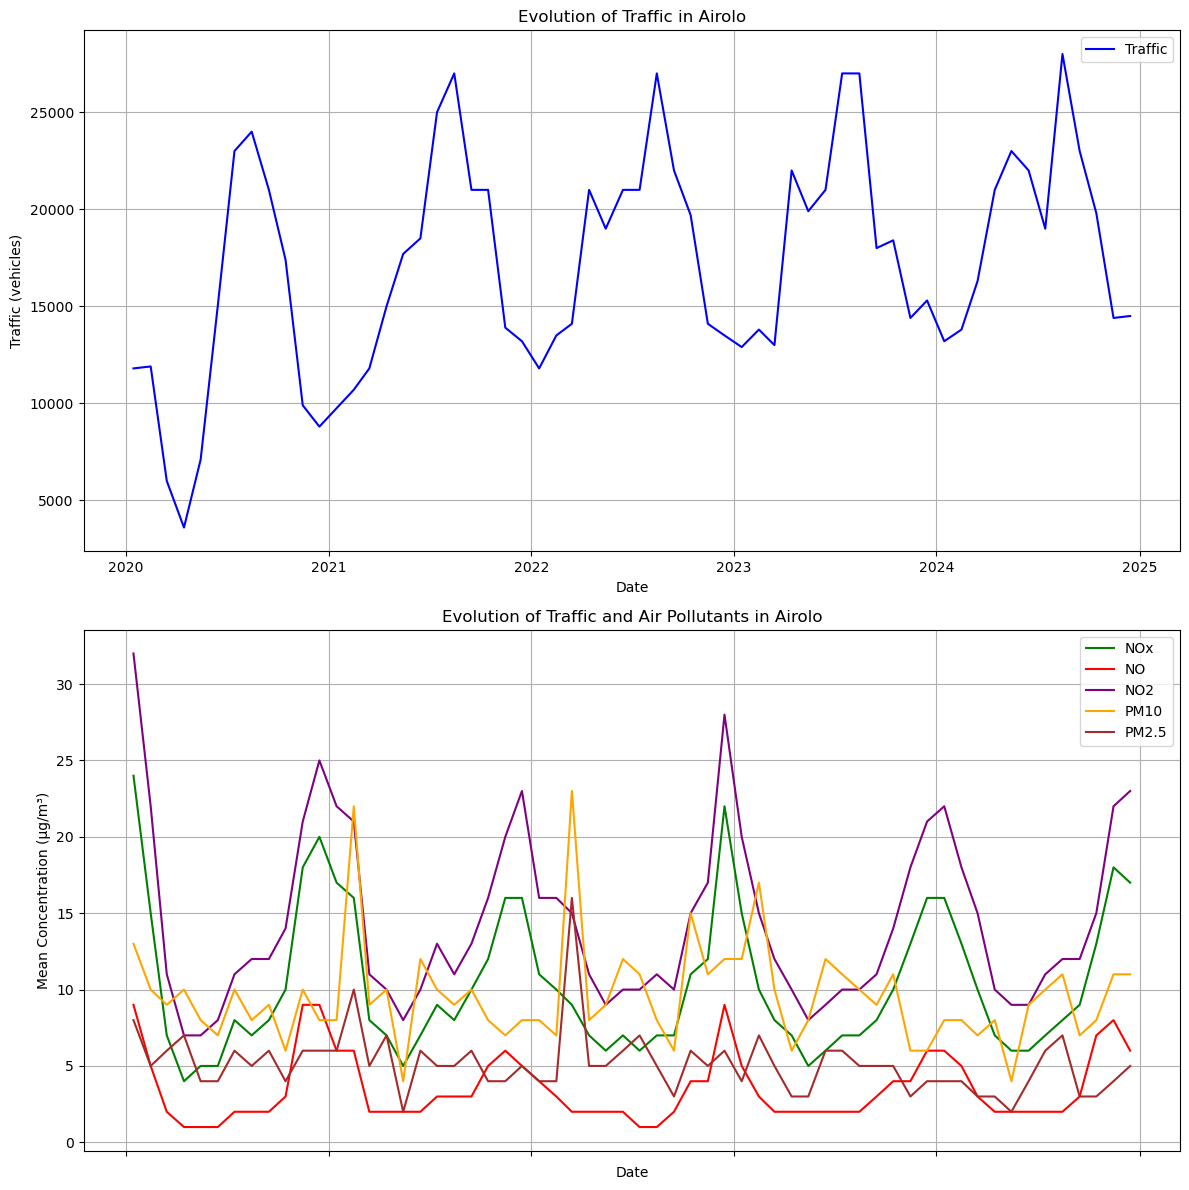

 Grafich saved in: graphics\Evolution of Traffic and Air Pollutants in Airolo.png


In [8]:
# Crea una figura con due sotto-grafici (due colonne)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))

# Primo grafico: Traffico (su ax1)
ax1.plot(df_airolo_combined['date'], df_airolo_combined['traffic'], label='Traffic', color='blue')
ax1.set_title("Evolution of Traffic in Airolo")
ax1.set_xlabel("Date")
ax1.set_ylabel("Traffic (vehicles)")
ax1.grid(True)
ax1.legend()

# Secondo grafico: Inquinanti (NOx, NO, NO2, PM10, PM2.5) su ax2
ax2.plot(df_airolo_combined['date'], df_airolo_combined['NOx'], label='NOx', color='green')
ax2.plot(df_airolo_combined['date'], df_airolo_combined['NO'], label='NO', color='red')
ax2.plot(df_airolo_combined['date'], df_airolo_combined['NO2'], label='NO2', color='purple')
ax2.plot(df_airolo_combined['date'], df_airolo_combined['PM10'], label='PM10', color='orange')
ax2.plot(df_airolo_combined['date'], df_airolo_combined['PM2.5'], label='PM2.5', color='brown')

ax2.set_title("Evolution of Air Pollutants in Airolo")
ax2.set_xlabel("Date")
ax2.set_ylabel("Mean Concentration (µg/m³)")
ax2.grid(True)
ax2.legend()
ax2.set_xticklabels([]) 
fig.tight_layout()
plt.title("Evolution of Traffic and Air Pollutants in Airolo")
output_path = custom_dir / "Evolution of Traffic and Air Pollutants in Airolo.png"

plt.savefig(output_path,dpi=300, bbox_inches='tight')
plt.show()
print(f" Grafich saved in: {output_path}")


In [9]:
base_path = Path.cwd() /"traffico_ticino"/ "data" / "media"
df_as = pd.read_csv(base_path / "AS_media.csv")
df_sp = pd.read_csv(base_path / "SP_media.csv")

df_as.columns = df_as.columns.str.strip()
df_sp.columns = df_sp.columns.str.strip()

df_as['date'] = pd.to_datetime(df_as['date'], dayfirst=True, errors='coerce')
df_sp['date'] = pd.to_datetime(df_sp['date'], dayfirst=True, errors='coerce')

print("AS date errors:\n", df_as[df_as['date'].isna()])
print("SP date errors:\n", df_sp[df_sp['date'].isna()])


AS date errors:
     date  media_highway
1    NaT        19379.0
2    NaT        19684.0
3    NaT        19781.0
6    NaT        19570.0
7    NaT        18950.0
..   ...            ...
253  NaT        14630.0
254  NaT        15044.0
257  NaT        14943.0
258  NaT        19019.0
259  NaT        16788.0

[157 rows x 2 columns]
SP date errors:
     date  media_main_roads
1    NaT           17584.0
2    NaT           17181.0
3    NaT           16971.0
6    NaT           16754.0
7    NaT           16359.0
..   ...               ...
253  NaT           16032.0
254  NaT           15459.0
257  NaT           15745.0
258  NaT           16048.0
259  NaT           11808.0

[157 rows x 2 columns]


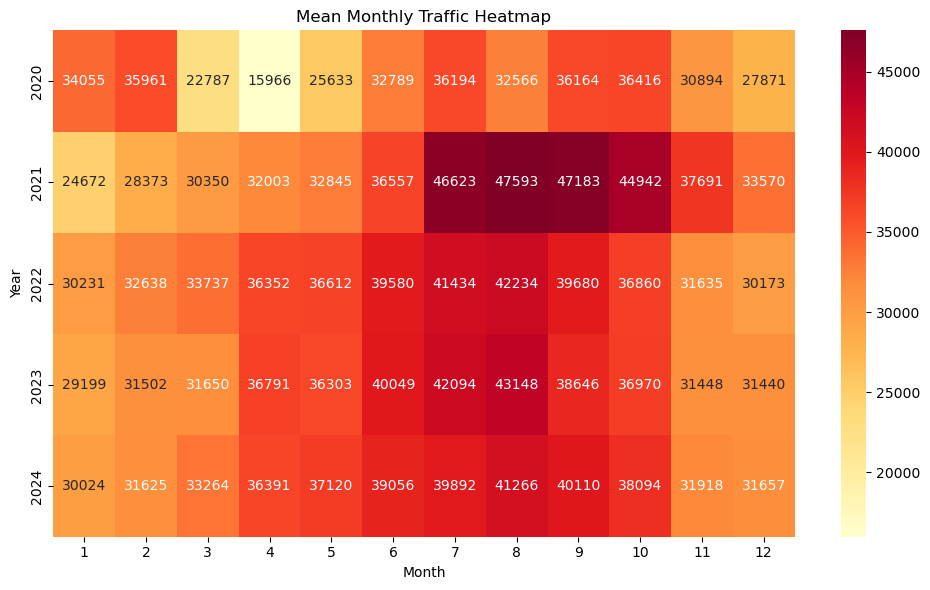

 Grafich saved in: graphics\Mean monthly traffic heatmap.png


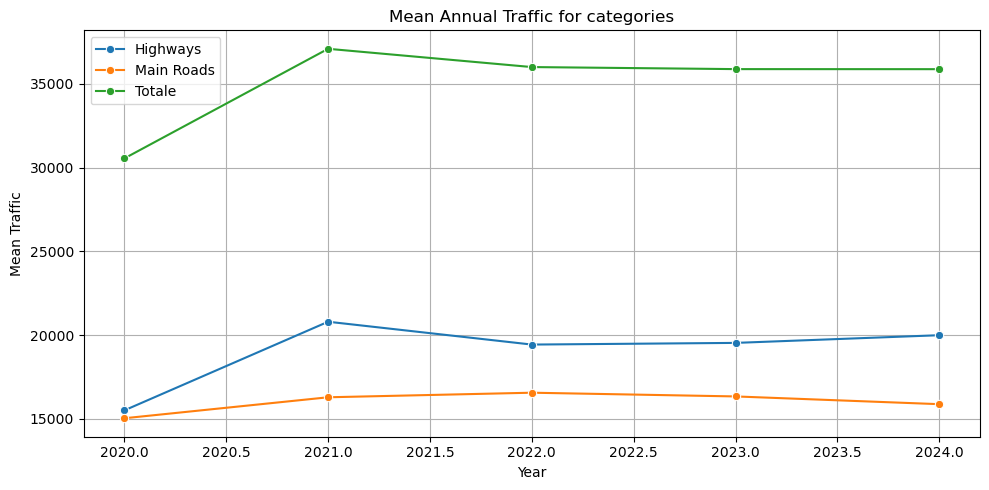

In [11]:
path = Path("traffico_ticino", "data", "media", "traffic_media.csv")
df = pd.read_csv(path)

# 2. Pulisci nomi colonne e data
df.columns = df.columns.str.strip().str.lower()
df['date'] = pd.to_datetime(df['date'], dayfirst=True)

# 3. Aggiungi anno/mese e colonna totale
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['total'] = df['highways'] + df['main roads']

# 4. HEATMAP traffico medio mensile
monthly_traffic = df.groupby(['year', 'month'])['total'].mean().reset_index()
pivot = monthly_traffic.pivot(index='year', columns='month', values='total')

plt.figure(figsize=(10, 6))
sns.heatmap(pivot, cmap='YlOrRd', annot=True, fmt=".0f")
plt.title("Mean Monthly Traffic Heatmap")
plt.xlabel("Month")
plt.ylabel("Year")
plt.tight_layout()
output_path = custom_dir / "Mean monthly traffic heatmap.png"
plt.savefig(output_path,dpi=300, bbox_inches='tight')
plt.show()
print(f" Grafich saved in: {output_path}")

# 5. LINEPLOT traffico medio annuo
annual_avg = df.groupby('year')[['highways', 'main roads', 'total']].mean().reset_index()

plt.figure(figsize=(10, 5))
sns.lineplot(data=annual_avg, x='year', y='highways', marker='o', label='Highways')
sns.lineplot(data=annual_avg, x='year', y='main roads', marker='o', label='Main Roads')
sns.lineplot(data=annual_avg, x='year', y='total', marker='o', label='Totale')
plt.title("Mean Annual Traffic for categories")
plt.ylabel("Mean Traffic")
plt.xlabel("Year")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


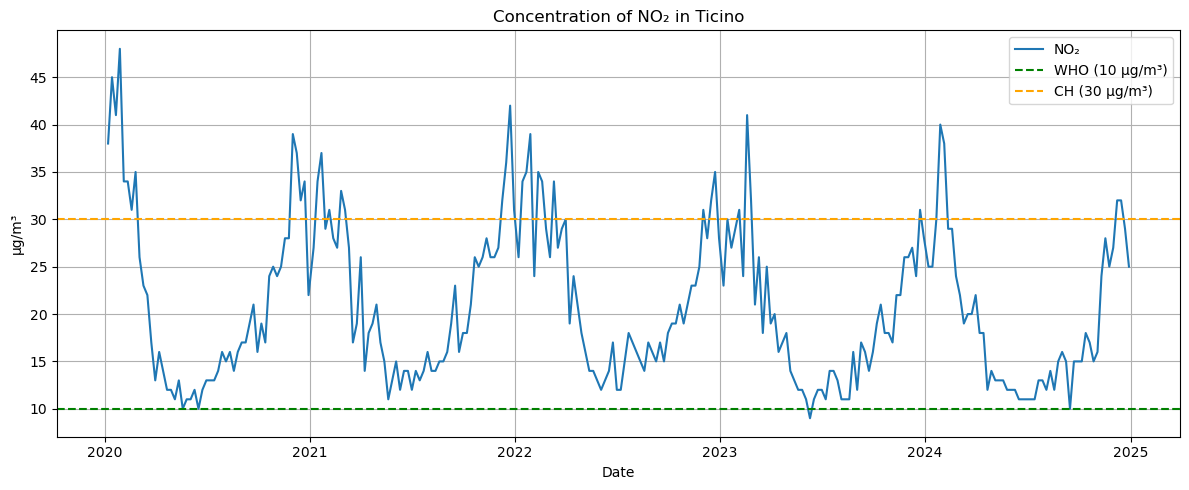

 Grafich saved in: graphics\Concentration of NO₂ in Ticino.png


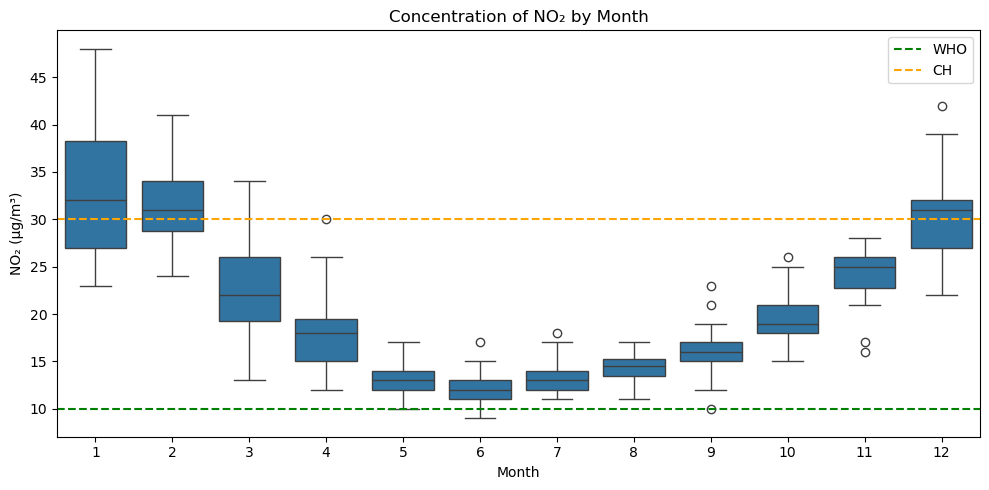


 NO2 Annual statistics:
        mean   max   min    std
year                          
2020  21.63  48.0  10.0  10.12
2021  21.77  42.0  11.0   7.80
2022  21.88  39.0  12.0   7.58
2023  19.19  41.0   9.0   7.14
2024  19.00  40.0  10.0   7.63


In [12]:
path2 = Path("traffico_ticino","data","media","NO2_media.csv")
df_no2 = pd.read_csv(path2)

# Pulizia colonne e parsing date
df_no2.columns = df_no2.columns.str.strip().str.lower()  # => 'date', 'media no2'
df_no2['date'] = pd.to_datetime(df_no2['date'])

# Rinomina colonna per comodità
df_no2 = df_no2.rename(columns={'media no2': 'no2'})

# Aggiungi anno/mese
df_no2['year'] = df_no2['date'].dt.year
df_no2['month'] = df_no2['date'].dt.month

# Lineplot nel tempo
plt.figure(figsize=(12, 5))
sns.lineplot(data=df_no2, x='date', y='no2', label='NO₂')
plt.axhline(10, color='green', linestyle='--', label='WHO (10 µg/m³)')
plt.axhline(30, color='orange', linestyle='--', label='CH (30 µg/m³)')
plt.title("Concentration of NO₂ in Ticino")
plt.ylabel("µg/m³")
plt.xlabel("Date")
plt.legend()
plt.grid(True)
plt.tight_layout()
output_path = custom_dir / "Concentration of NO₂ in Ticino.png"
plt.savefig(output_path,dpi=300, bbox_inches='tight')
plt.show()
print(f" Grafich saved in: {output_path}")


# Boxplot mensile
plt.figure(figsize=(10, 5))
sns.boxplot(data=df_no2, x='month', y='no2')
plt.axhline(10, color='green', linestyle='--', label='WHO')
plt.axhline(30, color='orange', linestyle='--', label='CH')
plt.title("Concentration of NO₂ by Month")
plt.xlabel("Month")
plt.ylabel("NO₂ (µg/m³)")
plt.legend()
plt.tight_layout()
plt.show()

# Statistiche annuali
annual_stats = df_no2.groupby('year')['no2'].agg(['mean', 'max', 'min', 'std']).round(2)
print("\n NO2 Annual statistics:\n", annual_stats)


 ANALYSIS: NO2


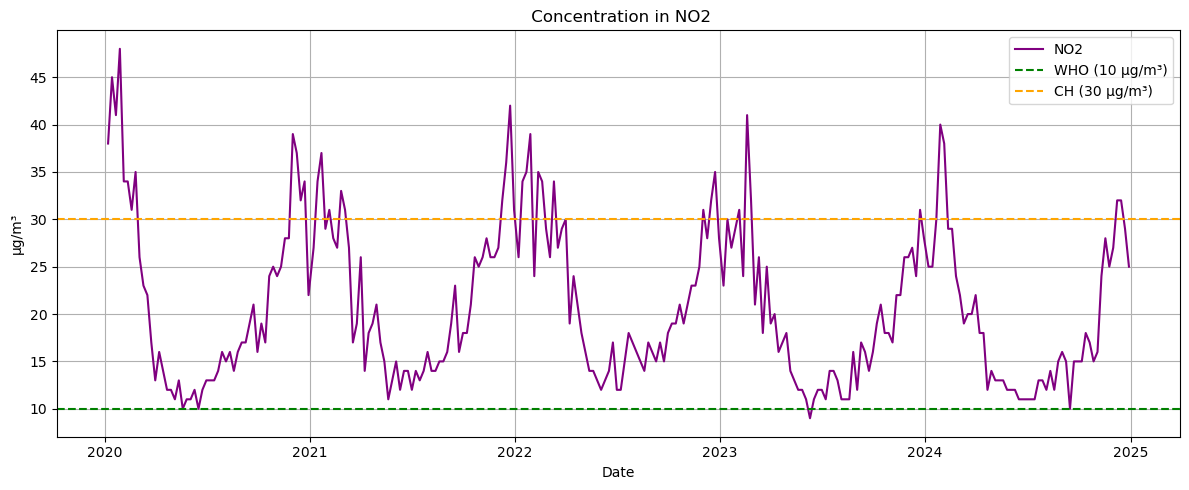

       mean   max   min    std
year                          
2020  21.63  48.0  10.0  10.12
2021  21.77  42.0  11.0   7.80
2022  21.88  39.0  12.0   7.58
2023  19.19  41.0   9.0   7.14
2024  19.00  40.0  10.0   7.63

 ANALYSIS: PM10


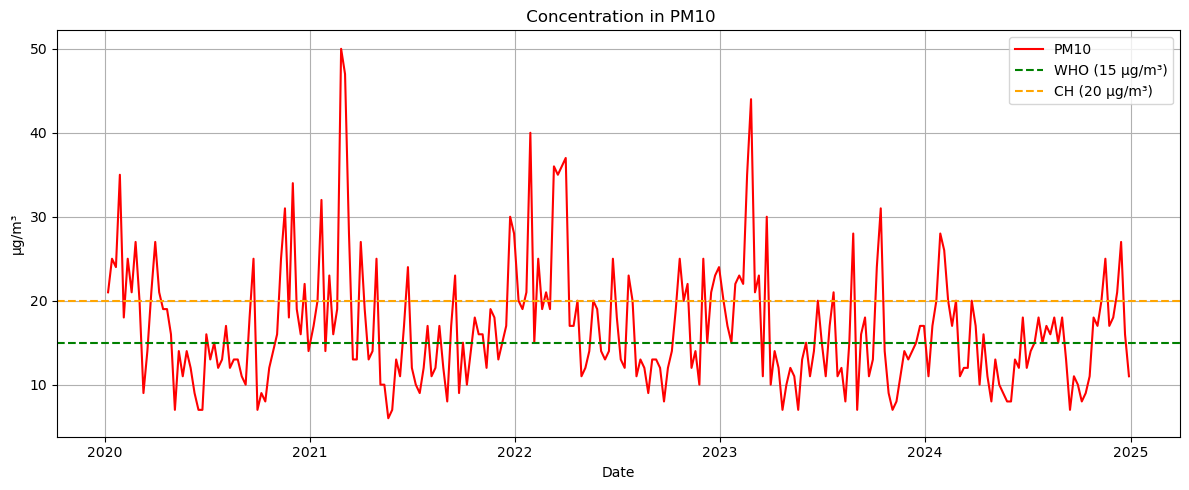

       mean   max  min   std
year                        
2020  16.85  35.0  7.0  6.91
2021  17.27  50.0  6.0  8.71
2022  18.69  40.0  8.0  7.53
2023  16.08  44.0  7.0  7.52
2024  15.08  28.0  7.0  5.10

 ANALYSIS: O3


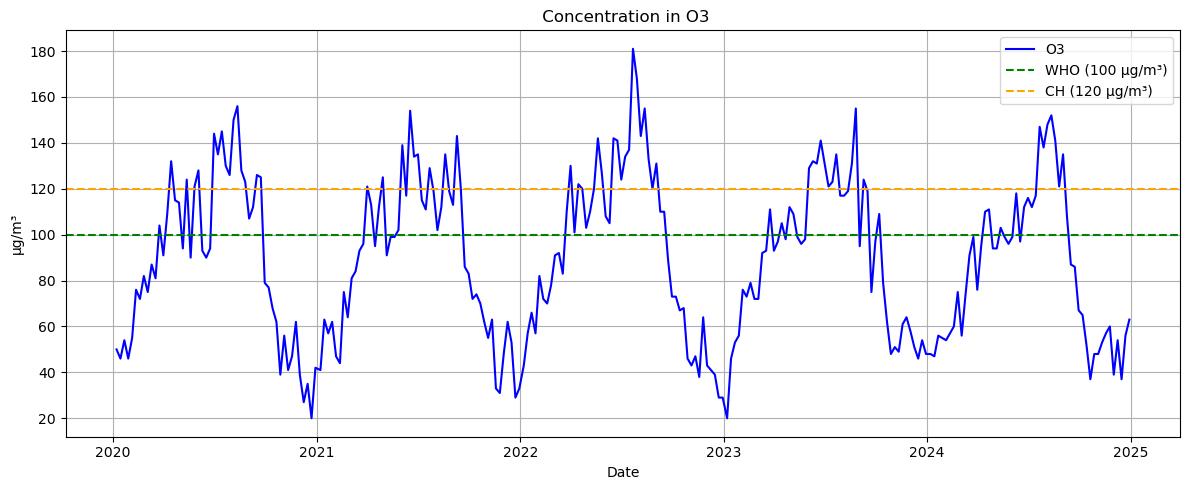

       mean    max   min    std
year                           
2020  88.92  156.0  20.0  36.45
2021  88.75  154.0  29.0  33.50
2022  94.37  181.0  29.0  39.09
2023  90.81  155.0  20.0  31.78
2024  85.00  152.0  37.0  32.52


In [13]:
path3 = Path("traffico_ticino", "data", "media")

# 2. File e parametri per ciascun inquinante
inquinanti = {
    "NO2": {
        "file": "NO2_media.csv",
        "col": "media no2",
        "who": 10,
        "ch": 30,
        "colore": "purple"
    },
    "PM10": {
        "file": "PM10_media.csv",
        "col": "media pm10",
        "who": 15,
        "ch": 20,
        "colore": "red"
    },
    "O3": {
        "file": "O3_media.csv",
        "col": "media o3",
        "who": 100,
        "ch": 120,
        "colore": "blue"
    }
}

# 3. Analisi per ogni inquinante
for nome, param in inquinanti.items():
    print(f"\n ANALYSIS: {nome}")
    
    # Carica
    df = pd.read_csv(base_path / param["file"])
    df.columns = df.columns.str.strip().str.lower()
    df = df.rename(columns={param["col"]: nome.lower()})
    df['date'] = pd.to_datetime(df['date'])
    
    # Anno
    df['year'] = df['date'].dt.year
    
    # Plot
    plt.figure(figsize=(12, 5))
    sns.lineplot(data=df, x='date', y=nome.lower(), color=param["colore"], label=nome)
    plt.axhline(param["who"], color='green', linestyle='--', label=f'WHO ({param["who"]} µg/m³)')
    plt.axhline(param["ch"], color='orange', linestyle='--', label=f'CH ({param["ch"]} µg/m³)')
    plt.title(f" Concentration in {nome}")
    plt.ylabel("µg/m³")
    plt.xlabel("Date")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    
    # Statistiche annuali
    stats = df.groupby('year')[nome.lower()].agg(['mean', 'max', 'min', 'std']).round(2)
    print(stats)


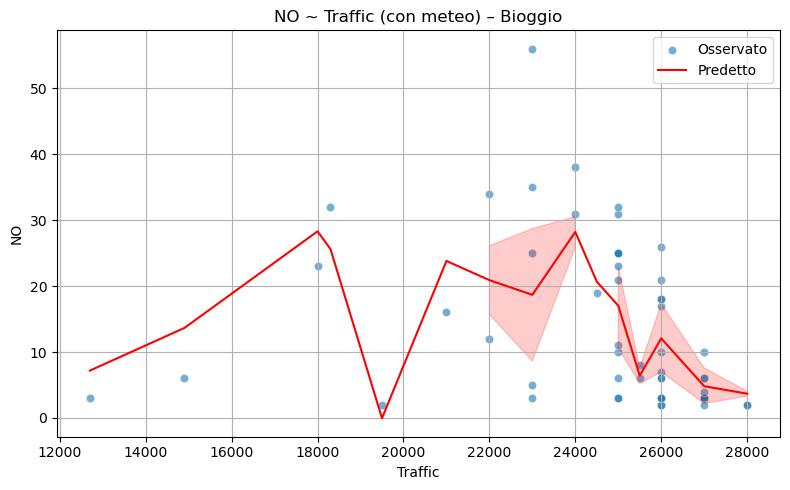

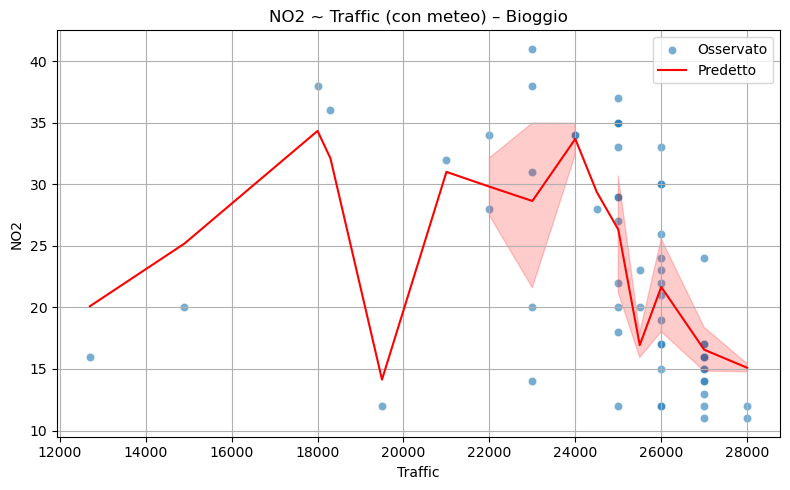

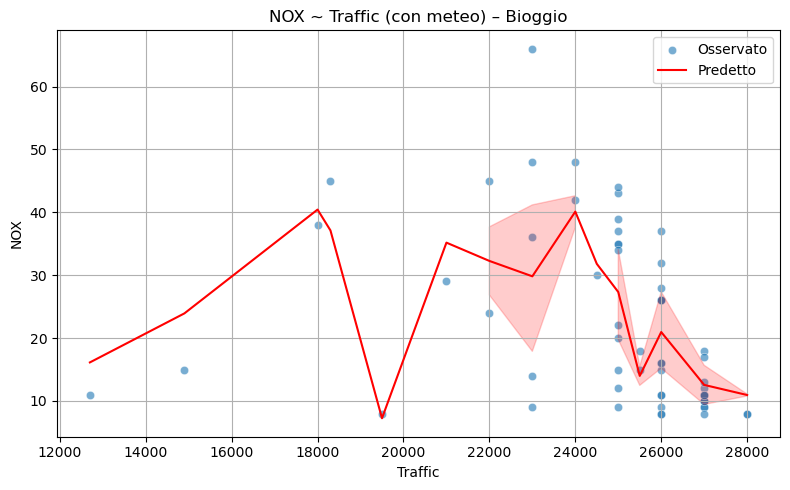

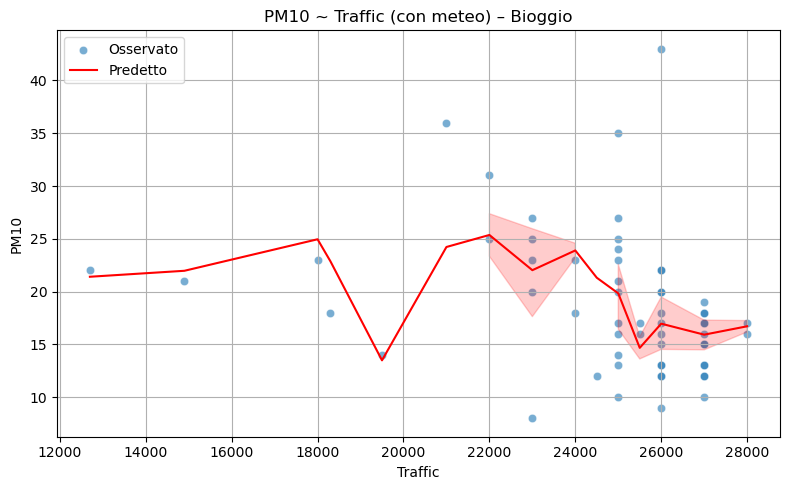

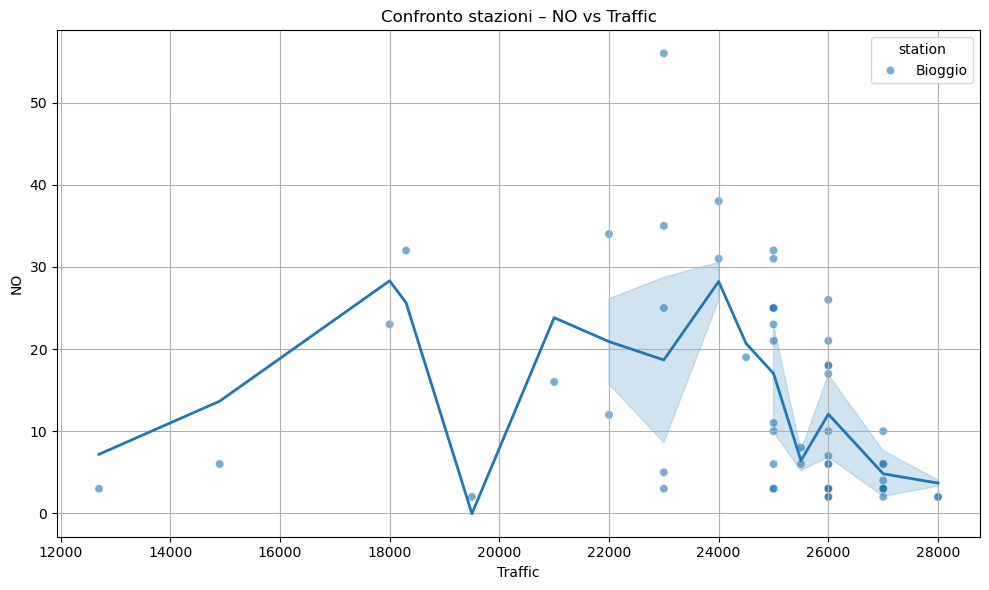

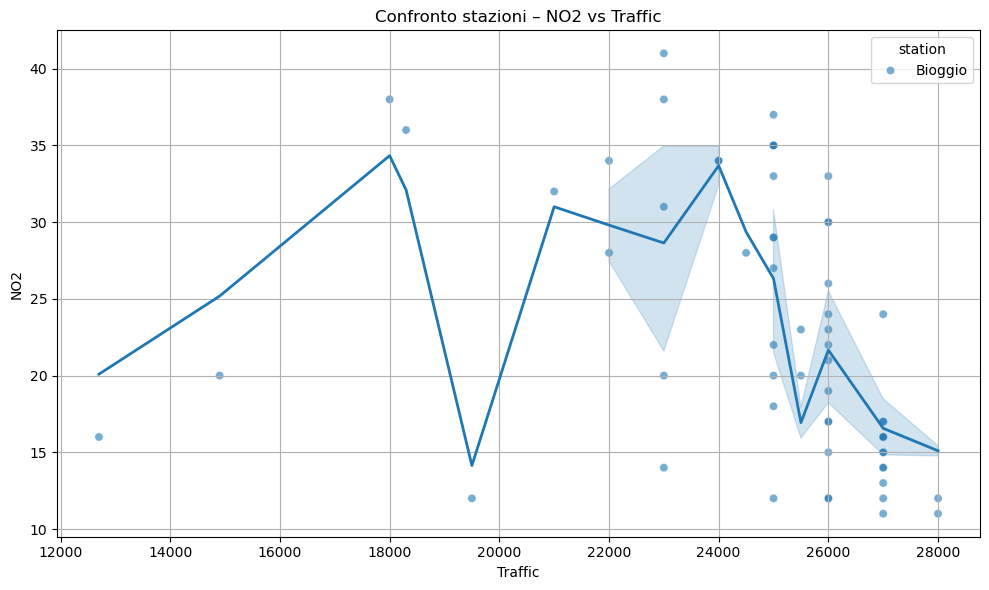

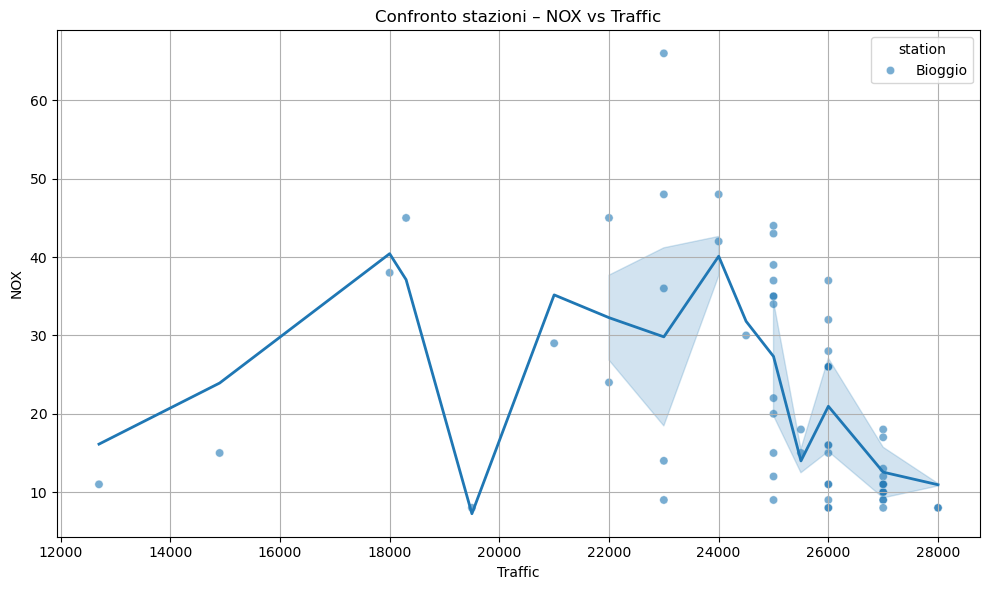

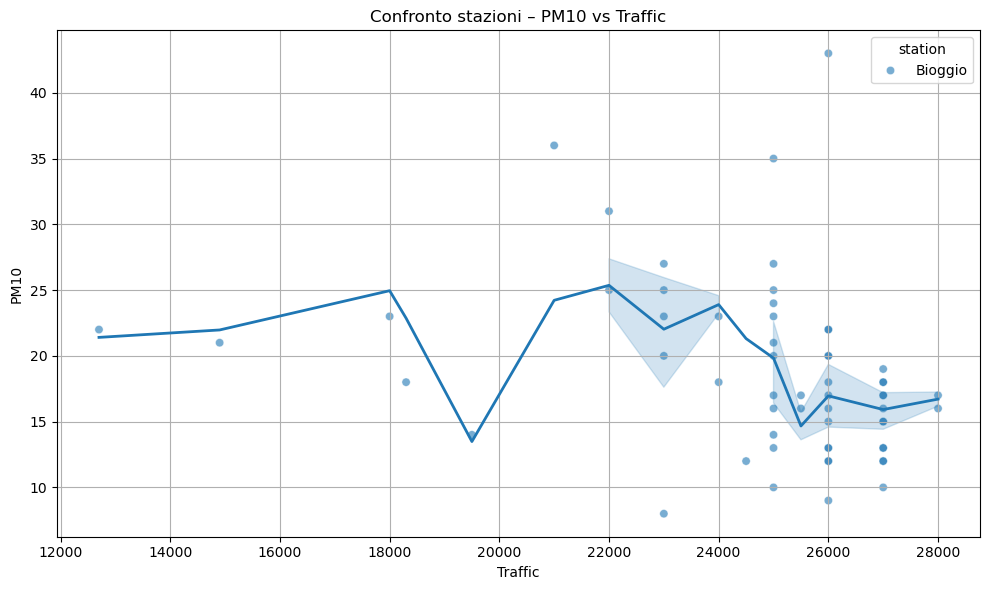

In [14]:
summary(station="Bioggio", pollutants="all", show="graphic")

In [15]:
summary(station="Airolo", pollutants="all", show="ols")


📌 Regressione per: NO – Airolo
                            OLS Regression Results                            
Dep. Variable:                     no   R-squared:                       0.790
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     48.89
Date:                Thu, 12 Jun 2025   Prob (F-statistic):           5.16e-17
Time:                        19:33:43   Log-Likelihood:                -76.038
No. Observations:                  57   AIC:                             162.1
Df Residuals:                      52   BIC:                             172.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const       

coeff_traffic  p_value  R_squared
Stazione                                   
Airolo          0.00009   0.0138       0.79


🔎 NO2


coeff_traffic  p_value  R_squared
Stazione                                   
Airolo          0.00025   0.0074      0.788


🔎 NOX


coeff_traffic  p_value  R_squared
Stazione                                   
Airolo          0.00021   0.0044      0.811


🔎 PM10


coeff_traffic  p_value  R_squared
Stazione                                   
Airolo         -0.00009   0.4485      0.178


📌 Regressione per: NO – Giubiasco
                            OLS Regression Results                            
Dep. Variable:                     no   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.643
Method:                 Least Squares   F-statistic:                     10.46
Date:                Thu, 12 Jun 2025   Prob (F-statistic):           0.000183
Time:                        19:33:51   Log-Likelihood:                -61.889
No. Observations:                  22   AIC:                             133.8
Df Residuals:                      17   BIC:                             139.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const    

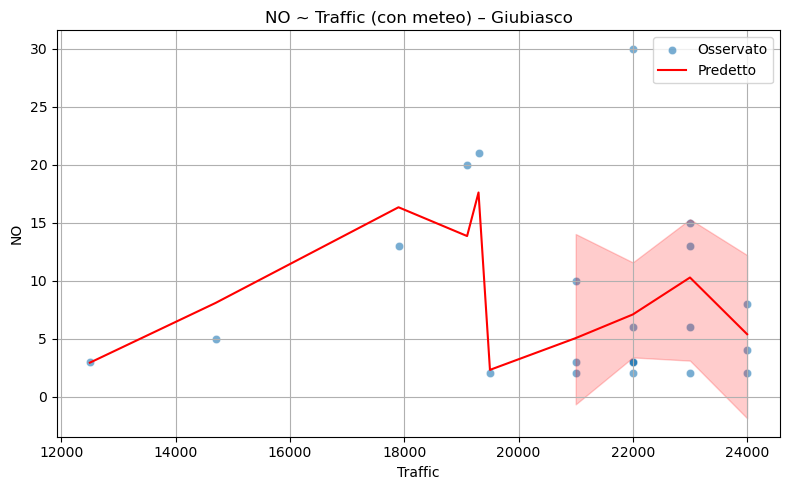


📌 Regressione per: NO2 – Giubiasco
                            OLS Regression Results                            
Dep. Variable:                    no2   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                     43.15
Date:                Thu, 12 Jun 2025   Prob (F-statistic):           1.09e-08
Time:                        19:33:51   Log-Likelihood:                -48.822
No. Observations:                  22   AIC:                             107.6
Df Residuals:                      17   BIC:                             113.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const   

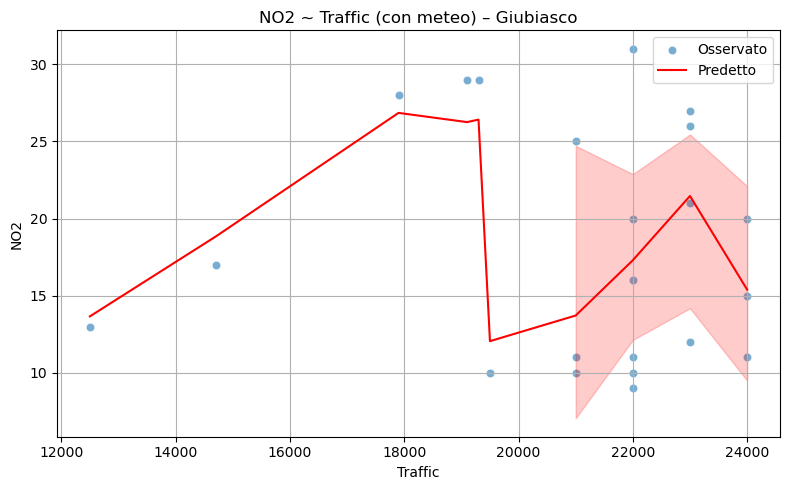


📌 Regressione per: NOX – Giubiasco
                            OLS Regression Results                            
Dep. Variable:                    nox   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     20.35
Date:                Thu, 12 Jun 2025   Prob (F-statistic):           2.65e-06
Time:                        19:33:51   Log-Likelihood:                -61.506
No. Observations:                  22   AIC:                             133.0
Df Residuals:                      17   BIC:                             138.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const   

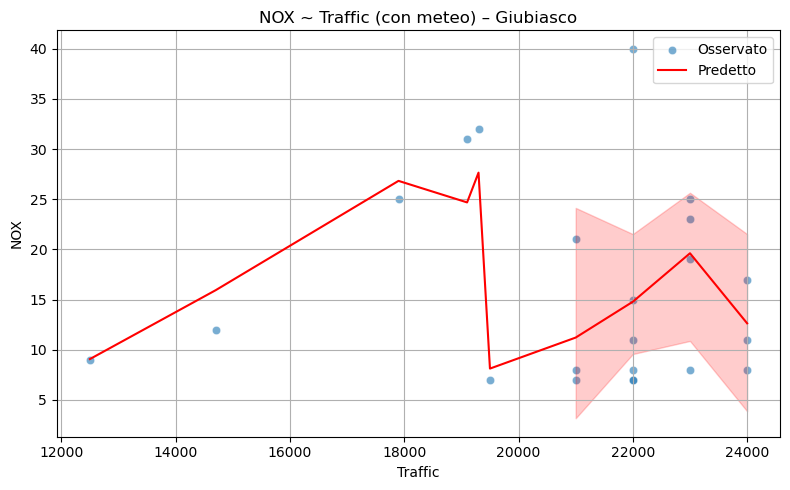


📌 Regressione per: PM10 – Giubiasco
                            OLS Regression Results                            
Dep. Variable:                   pm10   R-squared:                       0.458
Model:                            OLS   Adj. R-squared:                  0.331
Method:                 Least Squares   F-statistic:                     3.594
Date:                Thu, 12 Jun 2025   Prob (F-statistic):             0.0267
Time:                        19:33:51   Log-Likelihood:                -64.665
No. Observations:                  22   AIC:                             139.3
Df Residuals:                      17   BIC:                             144.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const  

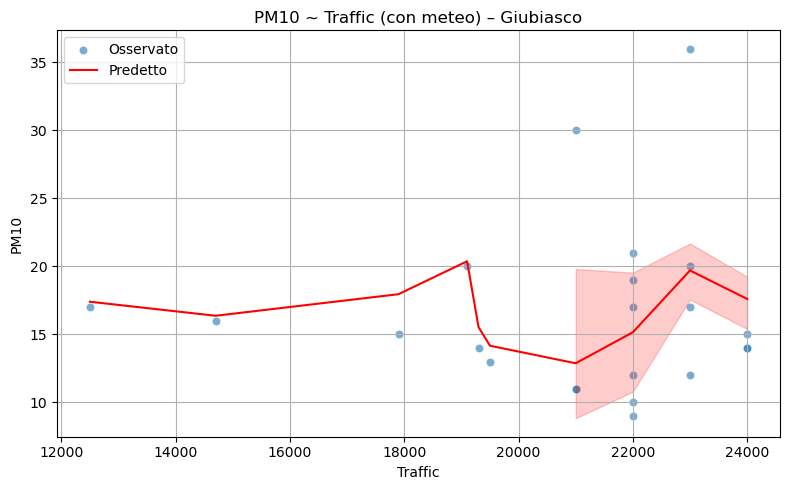



📊 Tabella comparativa delle regressioni OLS

🔎 NO


coeff_traffic  p_value  R_squared
Stazione                                    
Giubiasco         0.0004   0.2872      0.711


🔎 NO2


coeff_traffic  p_value  R_squared
Stazione                                    
Giubiasco        0.00048   0.0267       0.91


🔎 NOX


coeff_traffic  p_value  R_squared
Stazione                                    
Giubiasco        0.00063   0.0924      0.827


🔎 PM10


coeff_traffic  p_value  R_squared
Stazione                                    
Giubiasco        0.00029   0.4849      0.458

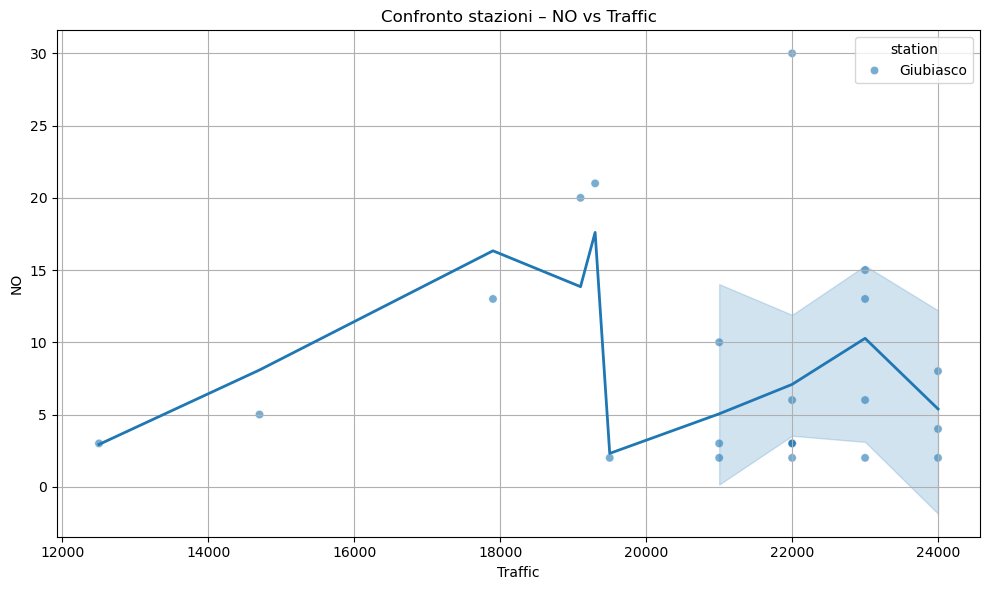

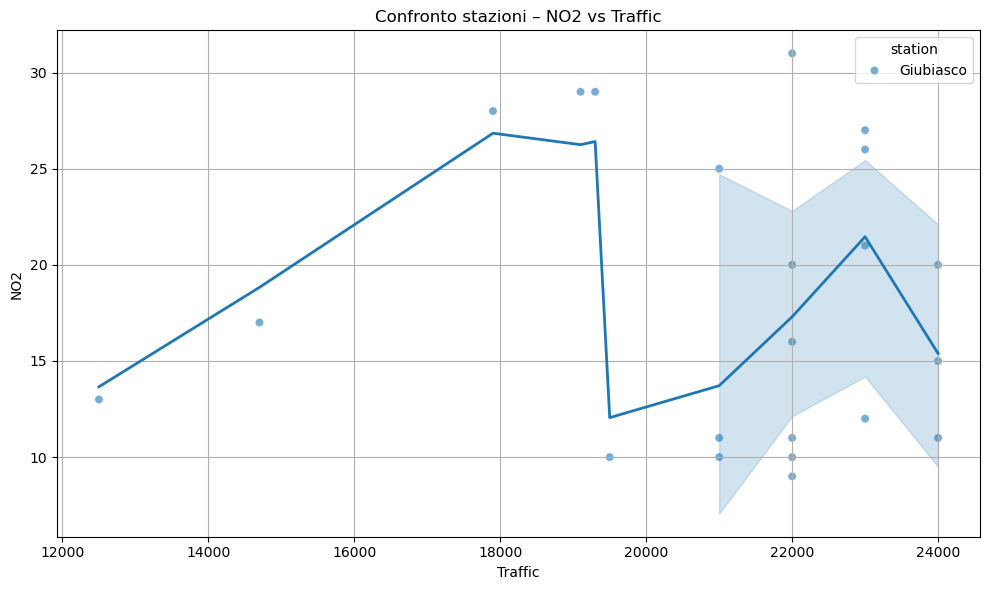

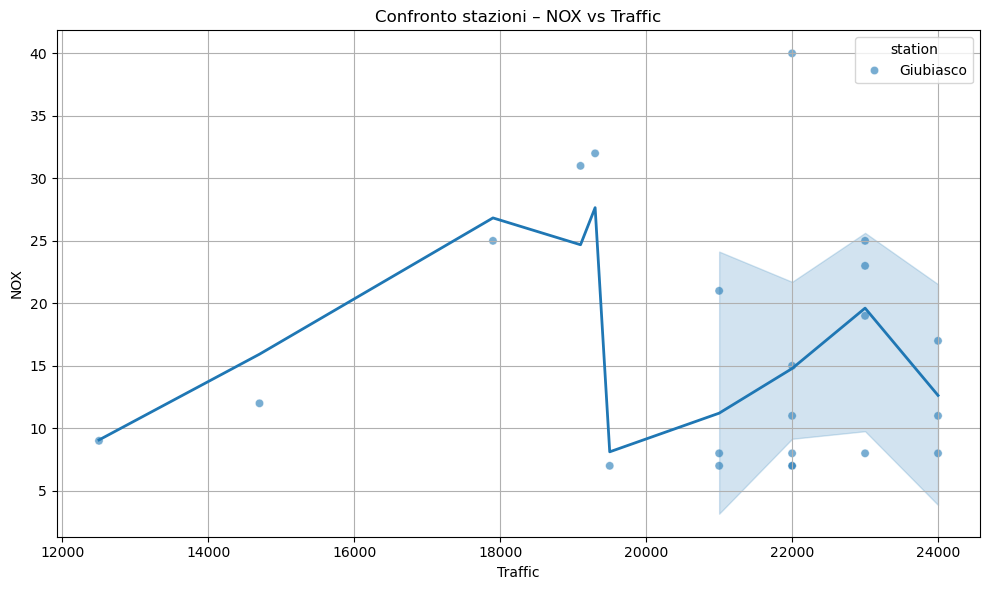

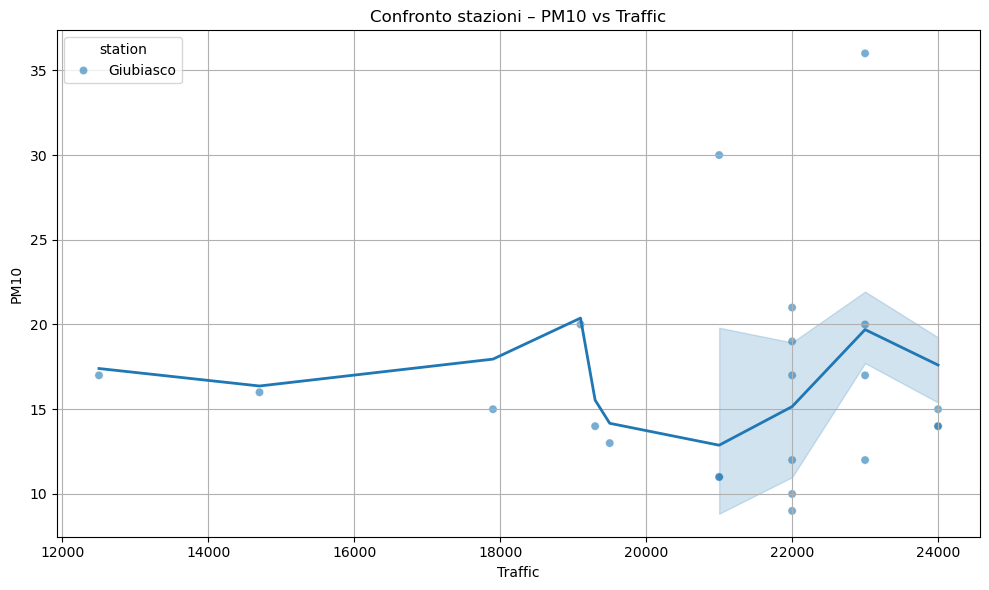

In [16]:
summary(station="Giubiasco", pollutants="all", show="all")

In [17]:
# Load Airolo data and visualize
df_airolo = Path("traffico_ticino", "data", "stazioni singole", "noO3", "Airolo_noO3.csv")
df_airolo = pd.read_csv(df_airolo)
df_airolo.info()
print(df_airolo.head(3))
df_airolo["date"] = pd.to_datetime(df_airolo["date"])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        60 non-null     object 
 1   traffic     60 non-null     float64
 2   no          60 non-null     float64
 3   no2         60 non-null     float64
 4   nox         60 non-null     float64
 5   pm10        60 non-null     float64
 6   pm25        60 non-null     float64
 7   station_id  60 non-null     object 
dtypes: float64(6), object(2)
memory usage: 3.9+ KB
         date  traffic   no   no2   nox  pm10  pm25 station_id
0  2020-01-15  11800.0  9.0  32.0  24.0  13.0   8.0     Airolo
1  2020-02-15  11900.0  5.0  22.0  15.0  10.0   5.0     Airolo
2  2020-03-15   6000.0  2.0  11.0   7.0   9.0   6.0     Airolo


In [18]:
# Step 2: Carichiamo il file meteo per Airolo e ne visualizziamo struttura e primi valori
df_meteo_airolo_path = Path("traffico_ticino", "data", "meteo_mensile", "airolo_meteo_mensile.csv")
df_meteo_airolo = pd.read_csv(df_meteo_airolo_path)
df_meteo_airolo.info()
print(df_meteo_airolo.head(3))
df_meteo_airolo["date"] = pd.to_datetime(df_meteo_airolo["date"], format="%Y-%m")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            59 non-null     object 
 1   precipitazioni  59 non-null     float64
 2   temperatura     59 non-null     float64
 3   vento           57 non-null     float64
dtypes: float64(3), object(1)
memory usage: 2.0+ KB
      date  precipitazioni  temperatura  vento
0  2020-02            42.7          2.2    1.5
1  2020-03            35.5          3.4    1.5
2  2020-04            42.1          9.0    1.4


In [19]:
df_airolo["month"] = df_airolo["date"].dt.to_period("M")
df_meteo_airolo["month"] = df_meteo_airolo["date"].dt.to_period("M")

df_airolo_full = pd.merge(df_airolo, df_meteo_airolo[["month", "temperatura", "precipitazioni", "vento"]], on="month", how="left")
print (df_airolo_full.head())

        date  traffic   no   no2   nox  pm10  pm25 station_id    month  \
0 2020-01-15  11800.0  9.0  32.0  24.0  13.0   8.0     Airolo  2020-01   
1 2020-02-15  11900.0  5.0  22.0  15.0  10.0   5.0     Airolo  2020-02   
2 2020-03-15   6000.0  2.0  11.0   7.0   9.0   6.0     Airolo  2020-03   
3 2020-04-15   3600.0  1.0   7.0   4.0  10.0   7.0     Airolo  2020-04   
4 2020-05-15   7100.0  1.0   7.0   5.0   8.0   4.0     Airolo  2020-05   

   temperatura  precipitazioni  vento  
0          NaN             NaN    NaN  
1          2.2            42.7    1.5  
2          3.4            35.5    1.5  
3          9.0            42.1    1.4  
4         12.3           116.7    1.6  


In [20]:
df_airolo_full = df_airolo_full.dropna(subset=["temperatura", "precipitazioni", "vento"])
print (df_airolo_full.head())

        date  traffic   no   no2   nox  pm10  pm25 station_id    month  \
1 2020-02-15  11900.0  5.0  22.0  15.0  10.0   5.0     Airolo  2020-02   
2 2020-03-15   6000.0  2.0  11.0   7.0   9.0   6.0     Airolo  2020-03   
3 2020-04-15   3600.0  1.0   7.0   4.0  10.0   7.0     Airolo  2020-04   
4 2020-05-15   7100.0  1.0   7.0   5.0   8.0   4.0     Airolo  2020-05   
5 2020-06-15  15050.0  1.0   8.0   5.0   7.0   4.0     Airolo  2020-06   

   temperatura  precipitazioni  vento  
1          2.2            42.7    1.5  
2          3.4            35.5    1.5  
3          9.0            42.1    1.4  
4         12.3           116.7    1.6  
5         14.4           161.9    1.5  


In [21]:
results_airolo_hist = monte_verita_simulation(
    df=df_airolo_full,
    variable="no2",
    traffic_col="traffic",
    trend_type="historical",          # scenario 1
    period_freq="Y",
    temp_col="temperature",
    wind_col="vento",
    rain_col="precipitazioni",
    n_periods= 48,
    coef_json_path = Path("traffico_ticino", "data", "coefficients", "pooled.json")
,
    n_simulations=10000,
    seed=42
)



c:\Users\arian\Desktop\pacchetto_python\traffico_ticino\simulation.py:37: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  full_dates = pd.date_range(start=first_date, periods=n_periods, freq=period_freq)
c:\Users\arian\Desktop\pacchetto_python\traffico_ticino\simulation.py:103: UserWarning: Colonna meteo 'temperature' non trovata. 'temperatura' impostata a 0.
  warnings.warn(f"Colonna meteo '{col}' non trovata. '{key}' impostata a 0.")


In [22]:
results_airolo_hist.head()
results_airolo_hist.describe()

sim_1       sim_2       sim_3       sim_4       sim_5       sim_6  \
count   48.000000   48.000000   48.000000   48.000000   48.000000   48.000000   
mean    78.235474   82.547368   82.508152   85.731939   85.493954   81.703406   
std     28.944135   34.514547   33.699884   30.902686   35.209959   33.124057   
min     32.167108    1.361124   31.950561    3.375007   13.262420   -1.505955   
25%     53.555213   59.281374   64.433788   70.924932   62.452897   53.961843   
50%     74.727004   82.097380   79.031010   83.552848   85.211058   85.817199   
75%    101.083752  108.191276   99.861097  110.186811  103.157263  105.422038   
max    139.035623  149.634526  162.972269  138.413701  193.572521  160.088344   

            sim_7       sim_8       sim_9      sim_10  ...    sim_9992  \
count   48.000000   48.000000   48.000000   48.000000  ...   48.000000   
mean    87.418356   82.646437   85.449432   81.676457  ...   83.385512   
std     30.645945   35.723161   32.403773   26.353931  ...   29.305027   
min     27.044753   20.234589   16.419059   17.031474  ...   15.679273   
25%     63.119949   53.157362   62.560053   65.991064  ...   69.816970   
50%     84.683282   78.576315   89.568512   80.902848  ...   83.905697   
75%    108.974240  109.799905  104.630431   92.758923  ...  104.329472   
max    145.656948  150.672897  151.925881  175.169051  ...  135.529173   

         sim_9993    sim_9994    sim_9995    sim_9996    sim_9997    sim_9998  \
count   48.000000   48.000000   48.000000   48.000000   48.000000   48.000000   
mean    87.201603   84.943667   85.113657   81.354060   83.719565   84.234997   
std     34.352257   27.737793   35.522785   35.195432   36.883808   36.621710   
min     18.459885   16.560285   19.215115    6.525981    6.866211   12.670700   
25%     66.439911   68.238710   57.055032   53.857714   59.250704   51.815384   
50%     87.078776   87.503832   83.053126   77.034000   82.629786   83.574537   
75%    106.960543  102.192800  111.289015  103.259275  106.579674  113.395241   
max    165.131132  145.324601  157.235415  164.486609  191.861397  162.634769   

         sim_9999   sim_10000  base_prediction  
count   48.000000   48.000000        48.000000  
mean    81.072189   83.783257        82.958648  
std     35.348216   36.535420        23.006504  
min     -9.431074   -9.929814        31.832918  
25%     60.478762   54.501631        70.306571  
50%     84.813191   83.818871        77.411045  
75%     99.804546  108.731719       100.527262  
max    148.270080  154.347577       130.941147  

[8 rows x 10001 columns]

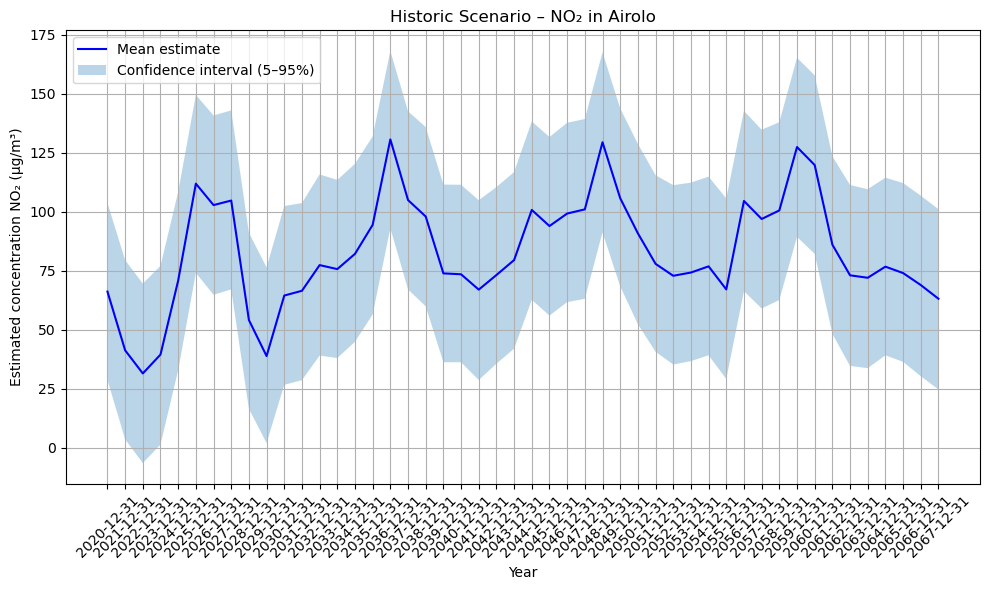

 Grafich saved in: graphics\Montecarlo simulation of NO2 in Airolo.png


In [23]:
sim_cols = results_airolo_hist.filter(like="sim_").columns

# Calcola media e intervalli (es. 5° e 95° percentile)
results_airolo_hist["mean"] = results_airolo_hist[sim_cols].mean(axis=1)
results_airolo_hist["q05"] = results_airolo_hist[sim_cols].quantile(0.05, axis=1)
results_airolo_hist["q95"] = results_airolo_hist[sim_cols].quantile(0.95, axis=1)

# Plot con banda di confidenza
plt.figure(figsize=(10, 6))
plt.plot(results_airolo_hist["date"], results_airolo_hist["mean"], label="Mean estimate", color="blue")
plt.fill_between(
    results_airolo_hist["date"],
    results_airolo_hist["q05"],
    results_airolo_hist["q95"],
    alpha=0.3,
    label="Confidence interval (5–95%)"
)

plt.title("Historic Scenario – NO₂ in Airolo")
plt.ylabel("Estimated concentration NO₂ (µg/m³)")
plt.xlabel("Year")
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
output_path = custom_dir / "Montecarlo simulation of NO2 in Airolo.png"
plt.savefig(output_path,dpi=300, bbox_inches='tight')
plt.show()
print(f" Grafich saved in: {output_path}")

In [24]:
df_bioggio = Path("traffico_ticino", "data", "stazioni singole", "noO3", "Bioggio_noO3.csv")
df_bioggio = pd.read_csv(df_bioggio)
df_bioggio["date"] = pd.to_datetime(df_bioggio["date"])
df_meteo_bioggio = Path("traffico_ticino", "data", "meteo_mensile", "bioggio_meteo_mensile.csv")
df_meteo_bioggio = pd.read_csv(df_meteo_bioggio)
df_meteo_bioggio["date"] = pd.to_datetime(df_meteo_bioggio["date"], format="%Y-%m")

df_bioggio["month"] = df_bioggio["date"].dt.to_period("M")
df_meteo_bioggio["month"] = df_meteo_bioggio["date"].dt.to_period("M")
df_bioggio_full = pd.merge(df_bioggio, df_meteo_bioggio[["month", "temperatura", "precipitazioni", "vento"]], on="month", how="left")
df_bioggio_full = df_bioggio_full.dropna(subset=["temperatura", "precipitazioni", "vento"])
print (df_bioggio_full.head())

        date  traffic    no   no2   nox  pm10  pm25 station_id    month  \
1 2020-02-15  25000.0  25.0  37.0  39.0  27.0  19.0    Bioggio  2020-02   
2 2020-03-15  14900.0   6.0  20.0  15.0  21.0  14.0    Bioggio  2020-03   
3 2020-04-15  12700.0   3.0  16.0  11.0  22.0  14.0    Bioggio  2020-04   
4 2020-05-15  19500.0   2.0  12.0   8.0  14.0   7.0    Bioggio  2020-05   
5 2020-06-15  25000.0   3.0  12.0   9.0  10.0   5.0    Bioggio  2020-06   

   temperatura  precipitazioni  vento  
1          7.1             2.1    1.6  
2          8.5           119.5    1.5  
3         13.4           137.0    1.5  
4         18.0           241.5    1.6  
5         20.1           333.9    1.6  


In [25]:
results_bioggio_hist = monte_verita_simulation(
    df=df_bioggio_full,
    variable="no2",
    traffic_col="traffic",
    trend_type="historical",          # scenario 1
    period_freq="Y",
    temp_col="temperature",
    wind_col="vento",
    rain_col="precipitazioni",
    n_periods= 48,
    coef_json_path = Path("traffico_ticino", "data", "coefficients", "pooled.json"),
    n_simulations=10000,
    seed=42
)

results_bioggio_hist.head()
results_bioggio_hist.describe()

c:\Users\arian\Desktop\pacchetto_python\traffico_ticino\simulation.py:37: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  full_dates = pd.date_range(start=first_date, periods=n_periods, freq=period_freq)
c:\Users\arian\Desktop\pacchetto_python\traffico_ticino\simulation.py:103: UserWarning: Colonna meteo 'temperature' non trovata. 'temperatura' impostata a 0.
  warnings.warn(f"Colonna meteo '{col}' non trovata. '{key}' impostata a 0.")


sim_1       sim_2       sim_3       sim_4       sim_5       sim_6  \
count   48.000000   48.000000   48.000000   48.000000   48.000000   48.000000   
mean   110.734569  113.391431  113.367267  115.353669  115.207030  112.871406   
std     18.001630   20.847322   19.598169   20.187691   21.358030   20.319977   
min     71.345984   48.313280   62.702709   45.095299   55.646507   69.788884   
25%     97.275278  102.340517  102.209260  109.059089  104.753047  100.834907   
50%    110.960911  116.657899  115.346705  119.268736  116.152146  116.155019   
75%    124.796757  127.493628  126.856452  129.598338  128.618065  129.223647   
max    142.036311  152.488528  156.449596  154.644058  167.644298  145.953616   

            sim_7       sim_8       sim_9      sim_10  ...    sim_9992  \
count   48.000000   48.000000   48.000000   48.000000  ...   48.000000   
mean   116.392789  113.452474  115.179597  112.854801  ...  113.907870   
std     18.791677   21.042632   19.731367   18.904870  ...   20.287082   
min     59.679895   67.945686   67.474929   59.165715  ...   62.264158   
25%    107.660126  106.383869  102.745532  107.225666  ...  100.873835   
50%    117.384670  114.630661  115.959781  113.835581  ...  117.683152   
75%    131.011493  123.349912  127.072372  121.512230  ...  128.000102   
max    145.744668  152.036248  155.725202  160.819590  ...  148.022435   

         sim_9993    sim_9994    sim_9995    sim_9996    sim_9997    sim_9998  \
count   48.000000   48.000000   48.000000   48.000000   48.000000   48.000000   
mean   116.259232  114.867959  114.972702  112.656150  114.113704  114.431297   
std     20.375160   15.008446   21.356018   20.189434   22.802783   22.405778   
min     58.849031   70.511078   67.359114   47.036835   47.246475   50.823029   
25%    104.936943  106.273184   99.662578  100.474359  100.789036  102.414860   
50%    118.324249  116.378905  119.016928  114.877032  116.815258  114.709816   
75%    127.503268  123.993290  131.943765  125.360925  127.542998  126.305939   
max    157.841274  143.330758  151.841007  154.173312  160.280303  160.355748   

         sim_9999   sim_10000  base_prediction  
count   48.000000   48.000000        48.000000  
mean   112.482469  114.152949       113.644849  
std     22.317260   22.172349        14.175927  
min     52.967435   36.897262        62.630221  
25%    106.996787  101.765375       110.590678  
50%    116.059761  115.835697       117.353158  
75%    127.535859  131.277818       122.657329  
max    145.017137  148.046282       130.308254  

[8 rows x 10001 columns]

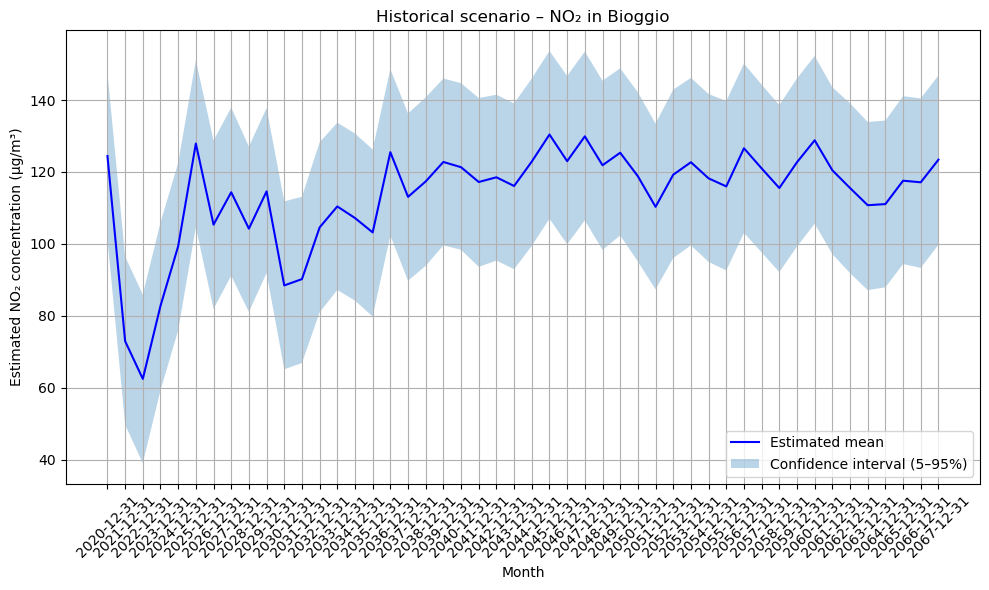

 Grafich saved in: graphics\Montecarlo simulation of NO2 in Bioggio.png


In [26]:
sim_cols = results_bioggio_hist.filter(like="sim_").columns

# Calcola statistiche
results_bioggio_hist["mean"] = results_bioggio_hist[sim_cols].mean(axis=1)
results_bioggio_hist["q05"] = results_bioggio_hist[sim_cols].quantile(0.05, axis=1)
results_bioggio_hist["q95"] = results_bioggio_hist[sim_cols].quantile(0.95, axis=1)

# Plot con media e intervallo di confidenza
plt.figure(figsize=(10, 6))
plt.plot(results_bioggio_hist["date"], results_bioggio_hist["mean"], label="Estimated mean", color="blue")
plt.fill_between(
    results_bioggio_hist["date"],
    results_bioggio_hist["q05"],
    results_bioggio_hist["q95"],
    alpha=0.3,
    label="Confidence interval (5–95%)"
)

# Titoli e assi in inglese
plt.title("Historical scenario – NO₂ in Bioggio")
plt.ylabel("Estimated NO₂ concentration (µg/m³)")
plt.xlabel("Month")
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
output_path = custom_dir / "Montecarlo simulation of NO2 in Bioggio.png"
plt.savefig(output_path,dpi=300, bbox_inches='tight')
plt.show()
print(f" Grafich saved in: {output_path}")

In [27]:
df_giubiasco = Path("traffico_ticino", "data", "stazioni singole", "noO3", "Giubiasco_noO3.csv")
df_giubiasco = pd.read_csv(df_giubiasco)
df_giubiasco["date"] = pd.to_datetime(df_giubiasco["date"])
df_meteo_giubiasco = Path("traffico_ticino", "data", "meteo_mensile", "giubiasco_meteo_mensile.csv")
df_meteo_giubiasco = pd.read_csv(df_meteo_giubiasco)
df_meteo_giubiasco["date"] = pd.to_datetime(df_meteo_giubiasco["date"], format="%Y-%m")

df_giubiasco["month"] = df_giubiasco["date"].dt.to_period("M")
df_meteo_giubiasco["month"] = df_meteo_giubiasco["date"].dt.to_period("M")
df_giubiasco_full = pd.merge(df_giubiasco, df_meteo_giubiasco[["month", "temperatura", "precipitazioni", "vento"]], on="month", how="left")
df_giubiasco_full = df_giubiasco_full.dropna(subset=["temperatura", "precipitazioni", "vento"])

print (df_giubiasco_full.head())


        date  traffic    no   no2   nox  pm10  pm25 station_id    month  \
1 2020-02-15  23000.0  13.0  27.0  25.0  20.0  13.0  Giubiasco  2020-02   
2 2020-03-15  14700.0   5.0  17.0  12.0  16.0  10.0  Giubiasco  2020-03   
3 2020-04-15  12500.0   3.0  13.0   9.0  17.0  10.0  Giubiasco  2020-04   
4 2020-05-15  19500.0   2.0  10.0   7.0  13.0   6.0  Giubiasco  2020-05   
5 2020-06-15  22000.0   3.0   9.0   7.0  10.0   4.0  Giubiasco  2020-06   

   temperatura  precipitazioni  vento  
1          8.5             3.1    1.6  
2         10.1            66.0    1.5  
3         15.4            18.3    1.4  
4         19.5           127.1    1.6  
5         21.4           234.3    1.6  


In [28]:
results_giubiasco_hist = monte_verita_simulation(
    df=df_giubiasco_full,
    variable="no2",
    traffic_col="traffic",
    trend_type="historical",          # scenario 1
    period_freq="Y",
    temp_col="temperature",
    wind_col="vento",
    rain_col="precipitazioni",
    coef_json_path = Path("traffico_ticino", "data", "coefficients", "pooled.json"),
    n_simulations=10000,
    seed=42
)

results_giubiasco_hist.head()
results_giubiasco_hist.describe()

c:\Users\arian\Desktop\pacchetto_python\traffico_ticino\simulation.py:37: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  full_dates = pd.date_range(start=first_date, periods=n_periods, freq=period_freq)
c:\Users\arian\Desktop\pacchetto_python\traffico_ticino\simulation.py:103: UserWarning: Colonna meteo 'temperature' non trovata. 'temperatura' impostata a 0.
  warnings.warn(f"Colonna meteo '{col}' non trovata. '{key}' impostata a 0.")


sim_1       sim_2       sim_3       sim_4       sim_5       sim_6  \
count   26.000000   26.000000   26.000000   26.000000   26.000000   26.000000   
mean    98.678284  102.591577  101.212601  102.706286  103.961937   98.568752   
std     16.409820   19.116523   16.079219   18.250074   17.818595   17.609211   
min     74.740014   53.625660   71.503842   55.362918   60.348116   71.970828   
25%     84.541698   89.528591   87.617785   92.051850   92.190103   82.757525   
50%     95.488005  103.011282  107.862422  103.738629  105.935851  102.202476   
75%    111.298946  119.276237  114.232828  116.229855  117.485731  109.473503   
max    136.177659  138.652198  128.943137  130.506099  137.381234  133.837841   

            sim_7       sim_8       sim_9      sim_10  ...    sim_9992  \
count   26.000000   26.000000   26.000000   26.000000  ...   26.000000   
mean   103.238422   98.935693  101.174588   97.603668  ...  101.815776   
std     15.788423   18.062191   17.254172   15.370430  ...   20.469400   
min     68.444662   72.082750   69.187690   64.359675  ...   55.747997   
25%     93.203013   84.555032   85.671149   89.164850  ...   92.218619   
50%    104.827491   97.423056  106.275456   99.582233  ...  103.585653   
75%    113.115180  111.929403  111.491519  107.042153  ...  113.028957   
max    128.891030  138.237588  130.790577  123.362975  ...  136.201462   

         sim_9993    sim_9994    sim_9995    sim_9996    sim_9997    sim_9998  \
count   26.000000   26.000000   26.000000   26.000000   26.000000   26.000000   
mean   104.908950  102.773161   99.705789   99.621130   96.323416  100.128200   
std     18.742603   13.675363   17.705853   14.730228   19.045966   19.018215   
min     63.283908   73.974646   75.772424   57.142749   57.334928   60.613598   
25%     91.937853   94.389362   84.099313   94.080711   84.175345   92.023749   
50%    104.688448  102.472884   96.749589   98.424390   98.443163   96.290788   
75%    120.116393  113.873909  111.841823  109.203183  105.752903  111.655780   
max    143.559124  129.315349  129.889667  125.294820  133.625482  144.148794   

         sim_9999   sim_10000  base_prediction  
count   26.000000   26.000000        26.000000  
mean    98.083937  101.534828       100.665946  
std     21.614736   20.771465        12.995241  
min     50.474080   47.847681        71.437391  
25%     84.901616   88.870105        90.586457  
50%    100.826802   99.393482       103.353096  
75%    115.016193  113.330059       110.790312  
max    139.228252  140.791635       118.319276  

[8 rows x 10001 columns]

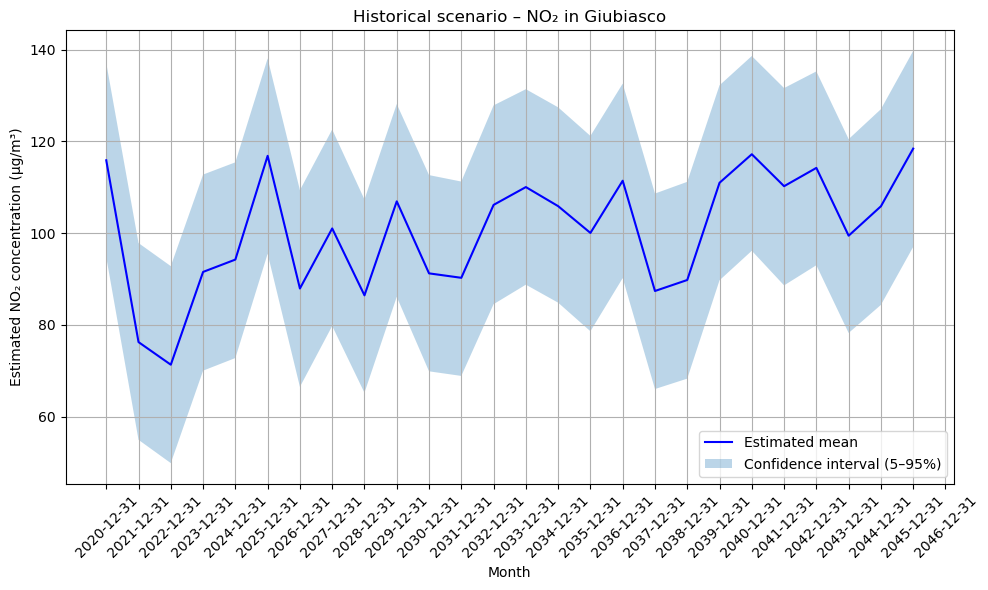

 Grafich saved in: graphics\Montecarlo simulation of NO2 in Giubiasco.png


In [29]:
sim_cols = results_giubiasco_hist.filter(like="sim_").columns

# Calcola media e intervalli di confidenza
results_giubiasco_hist["mean"] = results_giubiasco_hist[sim_cols].mean(axis=1)
results_giubiasco_hist["q05"] = results_giubiasco_hist[sim_cols].quantile(0.05, axis=1)
results_giubiasco_hist["q95"] = results_giubiasco_hist[sim_cols].quantile(0.95, axis=1)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(results_giubiasco_hist["date"], results_giubiasco_hist["mean"], label="Estimated mean", color="blue")
plt.fill_between(
    results_giubiasco_hist["date"],
    results_giubiasco_hist["q05"],
    results_giubiasco_hist["q95"],
    alpha=0.3,
    label="Confidence interval (5–95%)"
)

# Titoli e assi
plt.title("Historical scenario – NO₂ in Giubiasco")
plt.ylabel("Estimated NO₂ concentration (µg/m³)")
plt.xlabel("Month")
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
output_path = custom_dir / "Montecarlo simulation of NO2 in Giubiasco.png"
plt.savefig(output_path,dpi=300, bbox_inches='tight')
plt.show()
print(f" Grafich saved in: {output_path}")


c:\Users\arian\Desktop\pacchetto_python\traffico_ticino\simulation.py:37: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  full_dates = pd.date_range(start=first_date, periods=n_periods, freq=period_freq)


            sim_1       sim_2       sim_3       sim_4       sim_5       sim_6  \
count   48.000000   48.000000   48.000000   48.000000   48.000000   48.000000   
mean    99.251468  104.689305  104.639848  108.705447  108.405317  103.624963   
std     36.234880   43.141320   42.726229   39.791004   44.428069   42.157990   
min     44.178886   -1.631866   31.234825   -4.802513   13.377153    0.730665   
25%     70.477444   76.432317   81.556551   90.628176   80.011570   69.081389   
50%     96.619411  106.268035   98.660192  111.525506  108.803916  109.947140   
75%    126.801878  137.718260  125.949892  140.812251  129.052328  132.424376   
max    175.944249  188.252115  204.419059  173.447641  241.712307  201.435683   

            sim_7       sim_8       sim_9      sim_10  ...    sim_9992  \
count   48.000000   48.000000   48.000000   48.000000  ...   48.000000   
mean   110.832228  104.814243  108.349169  103.590977  ...  105.746309   
std     38.602241   44.979774   40.838564   33.3

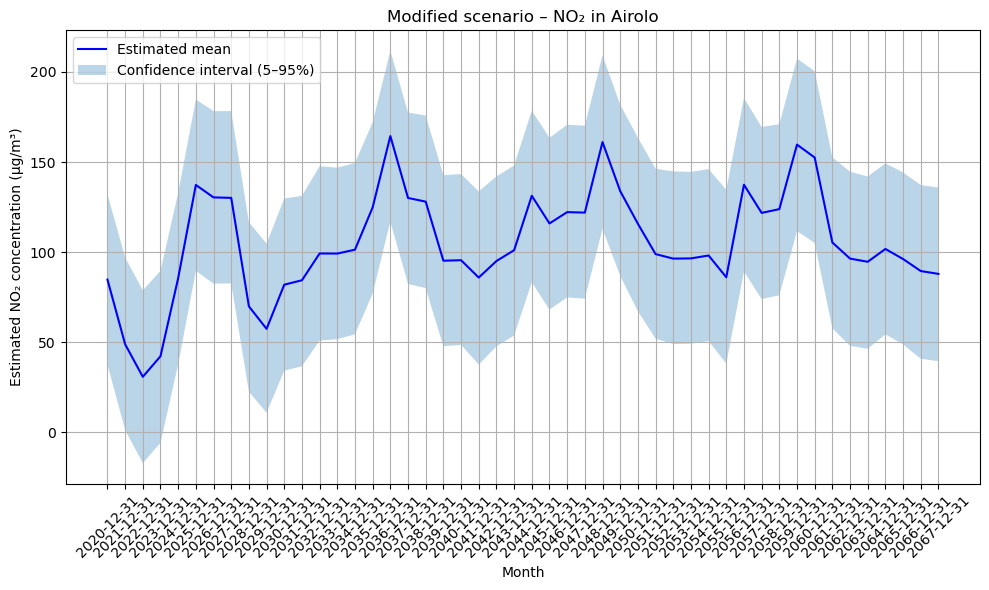

 Grafich saved in: graphics\Montecarlo simulation - increasing traffic of NO2 in Airolo.png


In [30]:
results_airolo_modified = monte_verita_simulation(
    df=df_airolo_full,                    
    variable="no2",
    traffic_col="traffic",
    trend_type="historical_modified",
    modification_factor=1.4,             # +40% traffic
    period_freq="Y",
    temp_col="temperatura",
    wind_col="vento",
    rain_col="precipitazioni",
    n_periods=48,                        
    coef_json_path = Path("traffico_ticino", "data", "coefficients", "pooled.json"),
    n_simulations=10000,
    seed=42
)
results_airolo_modified.head()
print(results_airolo_modified.describe())

sim_cols = results_airolo_modified.filter(like="sim_").columns

results_airolo_modified["mean"] = results_airolo_modified[sim_cols].mean(axis=1)
results_airolo_modified["q05"] = results_airolo_modified[sim_cols].quantile(0.05, axis=1)
results_airolo_modified["q95"] = results_airolo_modified[sim_cols].quantile(0.95, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(results_airolo_modified["date"], results_airolo_modified["mean"], label="Estimated mean", color="blue")
plt.fill_between(
    results_airolo_modified["date"],
    results_airolo_modified["q05"],
    results_airolo_modified["q95"],
    alpha=0.3,
    label="Confidence interval (5–95%)"
)

plt.title("Modified scenario – NO₂ in Airolo")
plt.ylabel("Estimated NO₂ concentration (µg/m³)")
plt.xlabel("Month")
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
output_path = custom_dir / "Montecarlo simulation - increasing traffic of NO2 in Airolo.png"
plt.savefig(output_path,dpi=300, bbox_inches='tight')
plt.show()
print(f" Grafich saved in: {output_path}")

In [31]:
results_giubiasco_modified = monte_verita_simulation(
    df=df_giubiasco_full,                    # già pronto con meteo dentro
    variable="no2",
    traffic_col="traffic",
    trend_type="historical_modified",
    modification_factor=1.4,             # +10% traffico
    period_freq="Y",
    n_periods=48,
    temp_col="temperatura",
    wind_col="vento",
    rain_col="precipitazioni",
    coef_json_path = Path("traffico_ticino", "data", "coefficients", "pooled.json"),
    n_simulations=10000,
    seed=42
)
results_giubiasco_modified.head()
results_giubiasco_modified.describe()


c:\Users\arian\Desktop\pacchetto_python\traffico_ticino\simulation.py:37: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  full_dates = pd.date_range(start=first_date, periods=n_periods, freq=period_freq)


sim_1       sim_2       sim_3       sim_4       sim_5       sim_6  \
count   26.000000   26.000000   26.000000   26.000000   26.000000   26.000000   
mean   122.848742  128.275953  126.363499  128.435040  130.176458  122.696836   
std     22.206188   26.095895   23.332789   25.961962   24.957803   23.806281   
min     91.312182   62.029409   81.020152   58.634859   71.352553   89.991287   
25%    105.975316  108.444807  105.733859  112.528947  116.896598   99.660901   
50%    114.262637  131.618181  132.302995  127.815024  138.444338  126.772280   
75%    138.685810  148.948454  141.908536  146.792915  143.370116  139.225874   
max    174.550291  178.720858  169.004228  169.301703  176.658679  173.922382   

            sim_7       sim_8       sim_9      sim_10  ...    sim_9992  \
count   26.000000   26.000000   26.000000   26.000000  ...   26.000000   
mean   129.173040  123.205733  126.310780  121.358393  ...  127.200022   
std     22.386247   24.143557   23.958193   20.984862  ...   28.734224   
min     77.177078   88.011846   86.787003   74.016594  ...   60.261179   
25%    113.546526  102.653740  105.661471  108.814161  ...  116.528149   
50%    131.707158  120.524535  130.157972  118.428223  ...  130.825712   
75%    146.092239  141.850845  141.208520  137.657946  ...  140.606406   
max    165.183429  178.145849  166.485898  153.604288  ...  176.611502   

         sim_9993    sim_9994    sim_9995    sim_9996    sim_9997    sim_9998  \
count   26.000000   26.000000   26.000000   26.000000   26.000000   26.000000   
mean   131.489839  128.527786  124.273754  124.156343  119.582856  124.859581   
std     25.189689   19.119991   24.120970   20.101972   25.847423   27.229716   
min     75.424101   90.250719   86.940101   61.103244   61.369771   65.916846   
25%    115.566190  116.297930  102.649515  114.240310  105.163606  111.805746   
50%    132.743038  130.692193  119.142565  125.798989  118.618708  121.560041   
75%    153.950519  140.848081  140.423719  135.319964  134.954495  133.384311   
max    185.526105  165.771902  163.735328  156.283497  166.752820  186.343899   

         sim_9999   sim_10000  base_prediction  
count   26.000000   26.000000        26.000000  
mean   122.024463  126.810384       125.605362  
std     29.973289   28.950946        18.022654  
min     60.833740   48.212233        80.927994  
25%    103.250705  109.496230       111.722162  
50%    120.959019  129.242905       130.499072  
75%    142.139155  146.279547       137.963606  
max    181.398158  185.436505       150.521826  

[8 rows x 10001 columns]

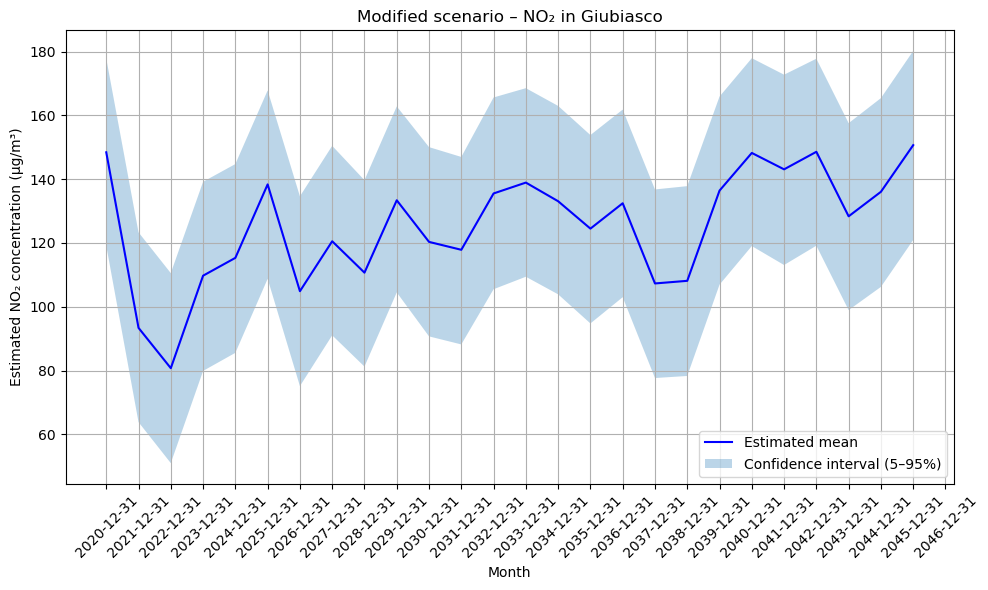

 Grafich saved in: graphics\Montecarlo simulation -increasing traffic of NO2 in Giubiasco.png


In [32]:
sim_cols = results_giubiasco_modified.filter(like="sim_").columns

results_giubiasco_modified["mean"] = results_giubiasco_modified[sim_cols].mean(axis=1)
results_giubiasco_modified["q05"] = results_giubiasco_modified[sim_cols].quantile(0.05, axis=1)
results_giubiasco_modified["q95"] = results_giubiasco_modified[sim_cols].quantile(0.95, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(results_giubiasco_modified["date"], results_giubiasco_modified["mean"], label="Estimated mean", color="blue")
plt.fill_between(
    results_giubiasco_modified["date"],
    results_giubiasco_modified["q05"],
    results_giubiasco_modified["q95"],
    alpha=0.3,
    label="Confidence interval (5–95%)"
)

plt.title("Modified scenario – NO₂ in Giubiasco")
plt.ylabel("Estimated NO₂ concentration (µg/m³)")
plt.xlabel("Month")
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
output_path = custom_dir / "Montecarlo simulation -increasing traffic of NO2 in Giubiasco.png"
plt.savefig(output_path,dpi=300, bbox_inches='tight')
plt.show()
print(f" Grafich saved in: {output_path}")

In [33]:
results_bioggio_modified = monte_verita_simulation(
    df=df_bioggio_full,                    # già pronto con meteo dentro
    variable="no2",
    traffic_col="traffic",
    trend_type="historical_modified",
    modification_factor=1.4,             # +10% traffico
    period_freq="Y",
    temp_col="temperatura",
    wind_col="vento",
    rain_col="precipitazioni",
    coef_json_path = Path("traffico_ticino", "data", "coefficients", "pooled.json"),
    n_simulations=10000,
    n_periods= 48,
    seed=42
)
results_bioggio_modified.head()
results_bioggio_modified.describe()

c:\Users\arian\Desktop\pacchetto_python\traffico_ticino\simulation.py:37: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  full_dates = pd.date_range(start=first_date, periods=n_periods, freq=period_freq)


sim_1       sim_2       sim_3       sim_4       sim_5       sim_6  \
count   48.000000   48.000000   48.000000   48.000000   48.000000   48.000000   
mean   140.737163  144.200688  144.169187  146.758692  146.567530  143.522776   
std     23.190905   26.737564   25.444702   26.586045   27.569551   25.861252   
min     85.954358   59.551751   74.079601   51.126315   69.111456   83.317246   
25%    127.337575  134.061034  129.475315  135.634064  133.972663  126.830723   
50%    139.589680  147.132663  145.267563  150.091478  149.931901  148.973815   
75%    156.506589  161.963758  159.965059  161.494730  162.926734  160.706691   
max    183.279126  197.282851  192.066885  201.984637  212.931656  187.609261   

            sim_7       sim_8       sim_9      sim_10  ...    sim_9992  \
count   48.000000   48.000000   48.000000   48.000000  ...   48.000000   
mean   148.113304  144.280265  146.531768  143.501129  ...  144.873926   
std     24.634445   26.694073   25.524794   24.877768  ...   27.536677   
min     70.139016   81.616059   80.300739   78.375182  ...   73.507899   
25%    137.823934  134.211958  129.712153  131.460258  ...  127.470365   
50%    150.699664  145.343117  147.717710  145.133010  ...  150.043966   
75%    167.164203  160.512073  165.665687  156.505156  ...  164.034230   
max    190.383258  196.693253  202.404739  210.487715  ...  191.460784   

         sim_9993    sim_9994    sim_9995    sim_9996    sim_9997    sim_9998  \
count   48.000000   48.000000   48.000000   48.000000   48.000000   48.000000   
mean   147.939197  146.125513  146.262057  143.242164  145.142254  145.556274   
std     25.812027   19.827181   27.146776   26.269596   28.873817   29.072659   
min     73.286314   88.489135   80.149761   53.657332   53.930621   58.593071   
25%    132.410884  135.212222  124.499241  128.847781  128.568010  131.501565   
50%    149.767053  147.807245  151.898118  149.631006  147.014569  146.022438   
75%    165.380087  160.827400  169.171662  157.762061  163.017136  162.813858   
max    204.260772  188.764380  189.552447  202.456925  200.259495  205.099315   

         sim_9999   sim_10000  base_prediction  
count   48.000000   48.000000        48.000000  
mean   143.015752  145.193414       144.531048  
std     29.069792   28.217151        18.479952  
min     61.388550   40.439230        73.985105  
25%    135.500754  130.357240       140.363146  
50%    148.227037  147.943444       151.065363  
75%    162.843560  164.293716       155.788817  
max    185.891379  193.422327       168.368311  

[8 rows x 10001 columns]

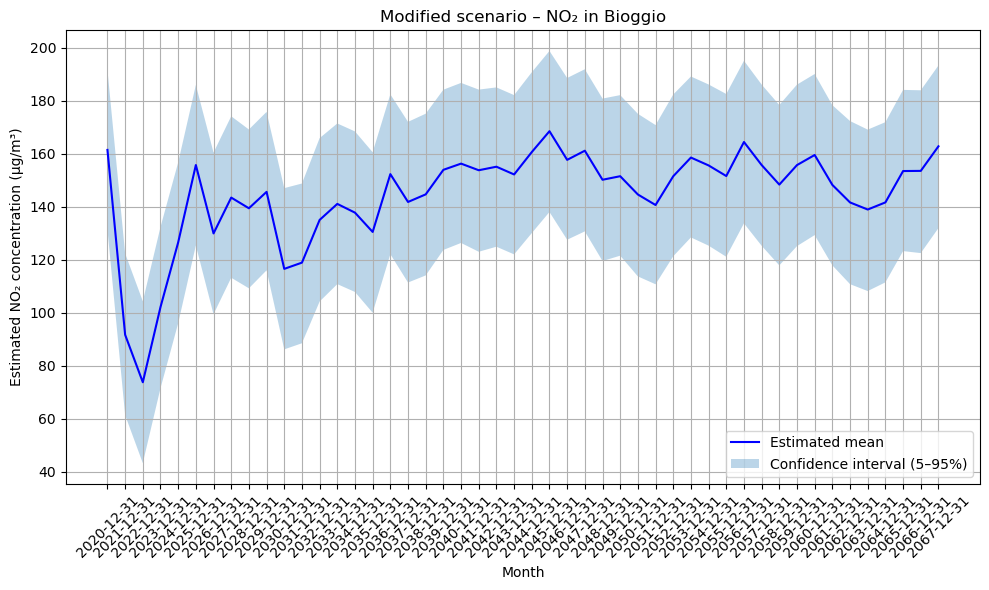

 Grafich saved in: graphics\Montecarlo simulation with traffic increasing of NO2 in Bioggio.png


In [34]:
sim_cols = results_bioggio_modified.filter(like="sim_").columns

# 2) statistiche di sintesi
results_bioggio_modified["mean"] = results_bioggio_modified[sim_cols].mean(axis=1)
results_bioggio_modified["q05"]  = results_bioggio_modified[sim_cols].quantile(0.05, axis=1)
results_bioggio_modified["q95"]  = results_bioggio_modified[sim_cols].quantile(0.95, axis=1)

# 3) grafico con la banda di confidenza
plt.figure(figsize=(10, 6))
plt.plot(
    results_bioggio_modified["date"],
    results_bioggio_modified["mean"],
    label="Estimated mean",
    color="blue"
)
plt.fill_between(
    results_bioggio_modified["date"],
    results_bioggio_modified["q05"],
    results_bioggio_modified["q95"],
    alpha=0.3,
    label="Confidence interval (5–95%)"
)

plt.title("Modified scenario – NO₂ in Bioggio")
plt.ylabel("Estimated NO₂ concentration (µg/m³)")
plt.xlabel("Month")
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
output_path = custom_dir / "Montecarlo simulation with traffic increasing of NO2 in Bioggio.png"
plt.savefig(output_path,dpi=300, bbox_inches='tight')
plt.show()
print(f" Grafich saved in: {output_path}")

In [35]:
results_growth_bioggio = monte_verita_simulation(
    df=df_bioggio_full,
    variable="no2",
    traffic_col="traffic",
    trend_type="exponential",           # ⬅️ crescita esponenziale
    growth_rate=0.007974,               # ⬅️ crescita mensile equivalente al 10% annuo
    period_freq="Y",
    n_periods=48,                       # ⬅️ default: 4 anni
    temp_col="temperatura",
    wind_col="vento",
    rain_col="precipitazioni",
    coef_json_path=Path("traffico_ticino", "data", "coefficients", "pooled.json"),
    n_simulations=1000,
    seed=42
)
results_growth_bioggio.head()
results_growth_bioggio.describe()

c:\Users\arian\Desktop\pacchetto_python\traffico_ticino\simulation.py:37: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  full_dates = pd.date_range(start=first_date, periods=n_periods, freq=period_freq)


sim_1       sim_2       sim_3       sim_4       sim_5       sim_6  \
count   48.000000   48.000000   48.000000   48.000000   48.000000   48.000000   
mean   124.933123  128.510617  128.478080  131.152793  130.955342  127.810398   
std     22.830140   25.440116   26.724204   26.820315   26.389021   27.680773   
min     82.870789   74.419202   60.323659   69.915917   70.469209   64.429008   
25%    111.353155  117.860516  110.583304  116.495956  110.228078  107.475447   
50%    123.420681  129.501219  126.411418  130.950573  134.125439  130.577400   
75%    139.283393  145.465048  150.012772  144.347081  145.219640  147.574893   
max    188.656891  180.361814  184.522620  207.084803  184.749781  184.299604   

            sim_7       sim_8       sim_9      sim_10  ...     sim_992  \
count   48.000000   48.000000   48.000000   48.000000  ...   48.000000   
mean   132.551980  128.592813  130.918403  127.788039  ...  130.504629   
std     24.242766   26.369317   27.849887   29.652767  ...   27.292946   
min     76.090498   71.645740   72.681637   59.990526  ...   77.329954   
25%    118.625556  111.809271  112.827007  109.089901  ...  116.772606   
50%    134.939808  126.424853  130.962329  126.507635  ...  127.716666   
75%    146.682482  143.026661  150.221699  140.524656  ...  150.051285   
max    195.101674  184.696641  196.332795  222.658352  ...  193.504383   

          sim_993     sim_994     sim_995     sim_996     sim_997     sim_998  \
count   48.000000   48.000000   48.000000   48.000000   48.000000   48.000000   
mean   133.967781  130.355427  124.653602  128.695281  129.405095  135.503383   
std     28.959050   30.409650   28.322203   22.294094   23.357165   28.241755   
min     65.654567   65.684536   68.138568   71.479426   80.828036   66.303043   
25%    114.061236  108.311651  105.410955  115.268170  114.748593  121.471007   
50%    133.818641  127.183361  129.124516  128.764799  129.447705  138.550068   
75%    153.539905  150.527340  146.725771  145.753075  144.704162  154.874220   
max    208.567054  188.914960  181.174200  176.856180  185.021303  195.287539   

          sim_999    sim_1000  base_prediction  
count   48.000000   48.000000        48.000000  
mean   122.724938  119.649606       128.851848  
std     28.777280   25.669429        19.088044  
min     41.163401   69.204242        87.340319  
25%    110.341168  100.649225       118.067189  
50%    127.642954  119.888794       128.646137  
75%    141.940774  135.112612       142.978256  
max    173.981453  187.934879       168.478496  

[8 rows x 1001 columns]

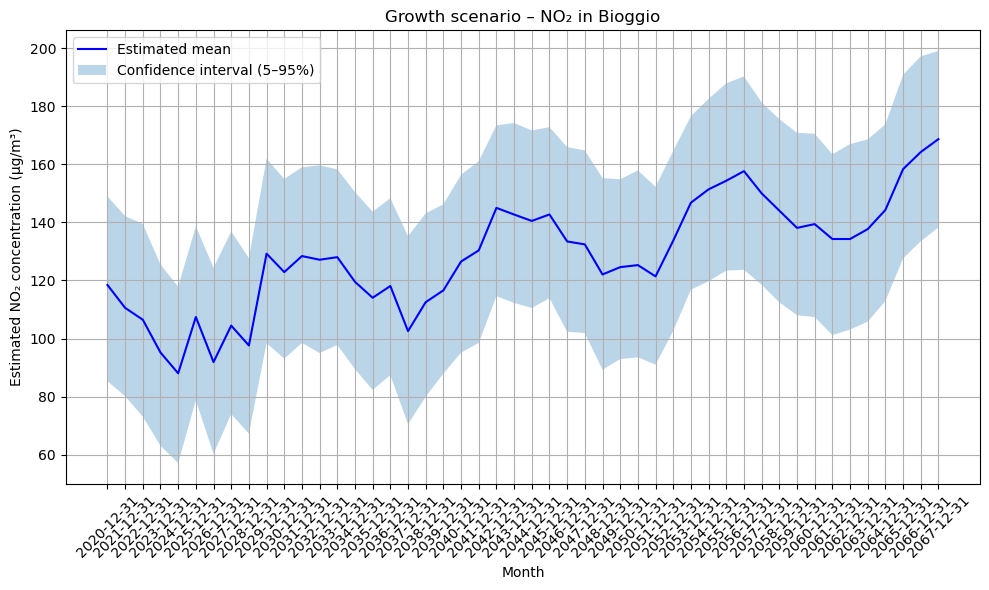

 Grafich saved in: graphics\Montecarlo simulation - exponential growth of NO2 in Bioggio.png


In [86]:
sim_cols = results_growth_bioggio.filter(like="sim_").columns

# 2) statistiche di sintesi
results_growth_bioggio["mean"] = results_growth_bioggio[sim_cols].mean(axis=1)
results_growth_bioggio["q05"]  = results_growth_bioggio[sim_cols].quantile(0.05, axis=1)
results_growth_bioggio["q95"]  = results_growth_bioggio[sim_cols].quantile(0.95, axis=1)

# 3) grafico con banda di confidenza
plt.figure(figsize=(10, 6))
plt.plot(
    results_growth_bioggio["date"],
    results_growth_bioggio["mean"],
    label="Estimated mean",
    color="blue"
)
plt.fill_between(
    results_growth_bioggio["date"],
    results_growth_bioggio["q05"],
    results_growth_bioggio["q95"],
    alpha=0.3,
    label="Confidence interval (5–95%)"
)

plt.title("Growth scenario – NO₂ in Bioggio")
plt.ylabel("Estimated NO₂ concentration (µg/m³)")
plt.xlabel("Month")
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
output_path = custom_dir / "Montecarlo simulation - exponential growth of NO2 in Bioggio.png"
plt.savefig(output_path,dpi=300, bbox_inches='tight')
plt.show()
print(f" Grafich saved in: {output_path}")

c:\Users\arian\Desktop\pacchetto_python\traffico_ticino\simulation.py:37: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  full_dates = pd.date_range(start=first_date, periods=n_periods, freq=period_freq)


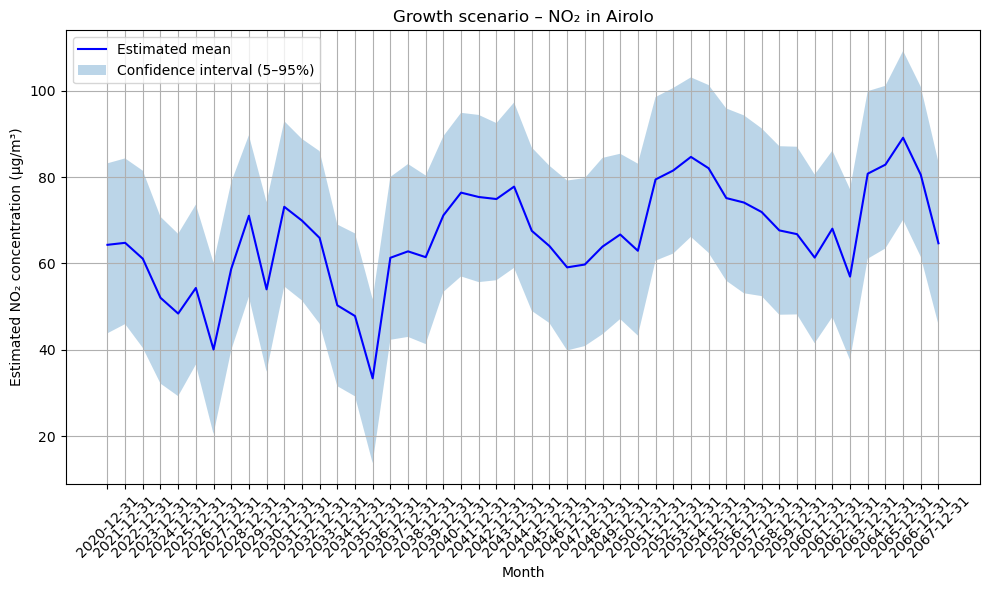

 Grafich saved in: graphics\Montecarlo simulation - exponential growth of NO2 in Airolo.png


In [36]:
results_growth_airolo = monte_verita_simulation(
    df=df_airolo_full,
    variable="no2",
    traffic_col="traffic",
    trend_type="exponential",           # ⬅️ crescita esponenziale
    growth_rate=0.007974,               # ⬅️ crescita mensile equivalente al 10% annuo
    period_freq="Y",
    n_periods=48,                       # ⬅️ default: 4 anni
    temp_col="temperatura",
    wind_col="vento",
    rain_col="precipitazioni",
    coef_json_path=Path("traffico_ticino", "data", "coefficients", "pooled.json"),
    n_simulations=1000,
    seed=42
)
results_growth_airolo.head()
results_growth_airolo.describe()

sim_cols = results_growth_airolo.filter(like="sim_").columns

# 2) statistiche di sintesi
results_growth_airolo["mean"] = results_growth_airolo[sim_cols].mean(axis=1)
results_growth_airolo["q05"]  = results_growth_airolo[sim_cols].quantile(0.05, axis=1)
results_growth_airolo["q95"]  = results_growth_airolo[sim_cols].quantile(0.95, axis=1)

# 3) grafico con banda di confidenza
plt.figure(figsize=(10, 6))
plt.plot(
    results_growth_airolo["date"],
    results_growth_airolo["mean"],
    label="Estimated mean",
    color="blue"
)
plt.fill_between(
    results_growth_airolo["date"],
    results_growth_airolo["q05"],
    results_growth_airolo["q95"],
    alpha=0.3,
    label="Confidence interval (5–95%)"
)

plt.title("Growth scenario – NO₂ in Airolo")
plt.ylabel("Estimated NO₂ concentration (µg/m³)")
plt.xlabel("Month")
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
output_path = custom_dir / "Montecarlo simulation - exponential growth of NO2 in Airolo.png"
plt.savefig(output_path,dpi=300, bbox_inches='tight')
plt.show()
print(f" Grafich saved in: {output_path}")

In [37]:
results_growth_giubiasco = monte_verita_simulation(
    df=df_giubiasco_full,
    variable="no2",
    traffic_col="traffic",
    trend_type="exponential",           # ⬅️ crescita esponenziale
    growth_rate=0.007974,               # ⬅️ crescita mensile equivalente al 10% annuo
    period_freq="Y",
    n_periods=60,                       # ⬅️ default: 4 anni
    temp_col="temperatura",
    wind_col="vento",
    rain_col="precipitazioni",
    coef_json_path=Path("traffico_ticino", "data", "coefficients", "pooled.json"),
    n_simulations=1000,
    seed=42
)
results_growth_giubiasco.head()
results_growth_giubiasco.describe()

c:\Users\arian\Desktop\pacchetto_python\traffico_ticino\simulation.py:37: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  full_dates = pd.date_range(start=first_date, periods=n_periods, freq=period_freq)


sim_1       sim_2       sim_3       sim_4       sim_5       sim_6  \
count   26.000000   26.000000   26.000000   26.000000   26.000000   26.000000   
mean   107.147021  108.913253  108.761651  107.455665  107.023584  112.346600   
std     17.443011   20.883063   20.914084   18.476145   19.821336   17.578445   
min     81.749638   73.160416   67.801636   81.906203   67.600391   83.676973   
25%     92.168625   97.140950   93.190548   92.688570   92.624587  100.804184   
50%    108.323925  113.622411  109.145756  102.941001  106.524750  111.236793   
75%    118.106772  117.631242  125.595842  119.044269  120.921570  121.803785   
max    141.405045  155.578172  144.358503  149.795666  149.345849  162.720768   

            sim_7       sim_8       sim_9      sim_10  ...     sim_992  \
count   26.000000   26.000000   26.000000   26.000000  ...   26.000000   
mean   111.783042  109.626539  107.304010  110.843409  ...  109.590746   
std     16.405285   20.859525   23.117866   22.666005  ...   17.918402   
min     85.589978   68.009153   72.839010   48.981390  ...   66.337963   
25%     97.194284   97.071320   85.847378   98.647705  ...  101.902824   
50%    110.753879  110.153411  109.426070  113.111154  ...  109.913667   
75%    125.213815  126.828160  124.224543  123.570846  ...  121.104373   
max    143.060346  142.716052  149.823709  152.254561  ...  136.624157   

          sim_993     sim_994     sim_995     sim_996     sim_997     sim_998  \
count   26.000000   26.000000   26.000000   26.000000   26.000000   26.000000   
mean   109.371104  107.971167  108.456046  113.465145  106.857859  116.920347   
std     22.372197   18.878931   23.225038   20.047933   21.763039   22.578318   
min     60.502525   63.198401   60.262391   77.262055   68.632042   70.683071   
25%     95.084579  103.079551   90.466530   96.218776   92.714323  105.990393   
50%    106.291471  106.788702  105.106297  115.209229  110.200083  121.193543   
75%    125.008014  117.102149  127.895538  128.332805  123.144864  133.749396   
max    151.810756  157.259145  146.600408  148.229858  150.709262  149.865071   

          sim_999    sim_1000  base_prediction  
count   26.000000   26.000000        26.000000  
mean   113.976980  119.370029       109.387031  
std     18.841872   18.552406        14.645085  
min     82.210467   87.130190        82.308125  
25%    102.413558  105.773156        98.399940  
50%    114.735124  116.733902       108.390694  
75%    129.520468  133.418866       119.522043  
max    151.456368  150.135794       133.934288  

[8 rows x 1001 columns]

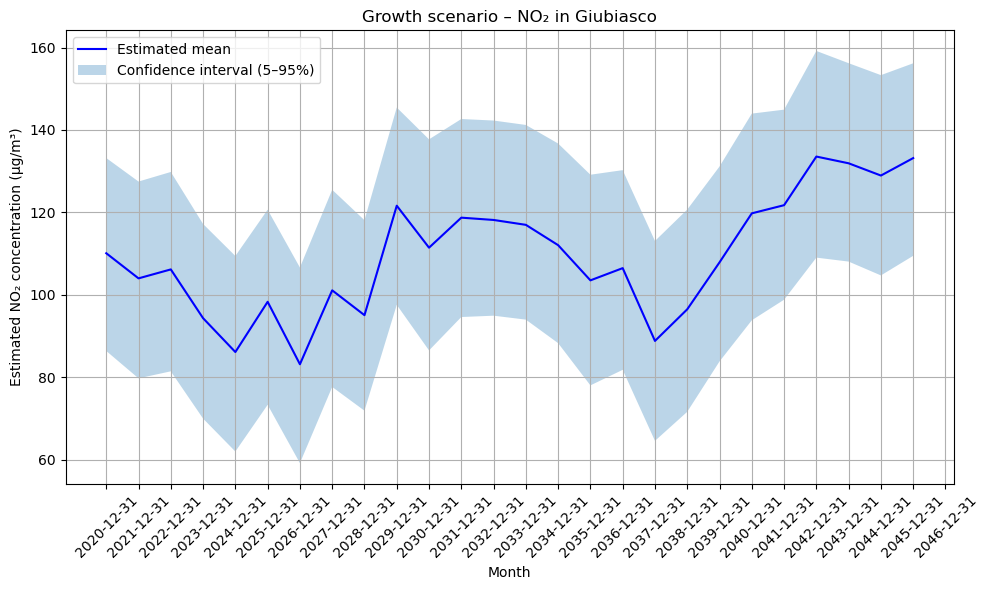

 Grafich saved in: graphics\Montecarlo simulation - exponential growth of NO2 in Giubiasco.png


In [38]:
sim_cols = results_growth_giubiasco.filter(like="sim_").columns

# 2) statistiche di sintesi
results_growth_giubiasco["mean"] = results_growth_giubiasco[sim_cols].mean(axis=1)
results_growth_giubiasco["q05"]  = results_growth_giubiasco[sim_cols].quantile(0.05, axis=1)
results_growth_giubiasco["q95"]  = results_growth_giubiasco[sim_cols].quantile(0.95, axis=1)

# 3) grafico con banda di confidenza
plt.figure(figsize=(10, 6))
plt.plot(
    results_growth_giubiasco["date"],
    results_growth_giubiasco["mean"],
    label="Estimated mean",
    color="blue"
)
plt.fill_between(
    results_growth_giubiasco["date"],
    results_growth_giubiasco["q05"],
    results_growth_giubiasco["q95"],
    alpha=0.3,
    label="Confidence interval (5–95%)"
)

plt.title("Growth scenario – NO₂ in Giubiasco")
plt.ylabel("Estimated NO₂ concentration (µg/m³)")
plt.xlabel("Month")
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
output_path = custom_dir / "Montecarlo simulation - exponential growth of NO2 in Giubiasco.png"
plt.savefig(output_path,dpi=300, bbox_inches='tight')
plt.show()
print(f" Grafich saved in: {output_path}")

In [39]:
'''LLM
the LLM model is not included on this repository, but you can use the following code to run it locally;
see the user guide for more details
'''

'LLM\nthe LLM model is not included on this repository, but you can use the following code to run it locally;\nsee the user guide for more details\n'

In [40]:
from langchain_community.document_loaders import PyMuPDFLoader

In [41]:
import os, re
from pathlib import Path
from typing import List

from dotenv import load_dotenv
from unstructured.partition.pdf import partition_pdf
from langchain.docstore.document import Document
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain_huggingface import HuggingFaceEmbeddings
from langchain_community.vectorstores import Chroma
from langchain_community.llms import GPT4All
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.runnables import RunnablePassthrough
from langchain_core.output_parsers import StrOutputParser

In [42]:
#data paths CHANGE THESE TO YOURS
RAW_PDF_DIR = Path(r"C:\Users\arian\Desktop\DATI_PER_RAG")
DB_DIR      = Path(r"C:\Users\arian\Desktop\DATI_RAG_PULITI")
TXT_DIR     = DB_DIR / "txt_clean"

CHUNK_SIZE      = 1_000
CHUNK_OVERLAP   = 100
EMB_MODEL_NAME  = "sentence-transformers/all-MiniLM-L6-v2"

MODEL_PATH = r"C:\Users\arian\Desktop\gemma-2-9b-it.Q6_K.gguf"

force_rebuild = True   #after first run, set to False to reuse existing index


load_dotenv()           


_page_re   = re.compile(r"(Pagina|Page)\s+\d+\s*(di|of)?\s*\d*", re.I)
_space_re  = re.compile(r"\s+")
def clean_text(text: str) -> str:
    text = _page_re.sub(" ", text)
    text = _space_re.sub(" ", text)
    text = re.sub(r"\n{2,}", "\n\n", text)
    return text.strip()


def build_or_load_vector_db() -> Chroma:
    """
    If a Chroma index exists in DB_DIR, it reopens it,
    otherwise it builds it from the raw PDFs.
    """
    DB_DIR.mkdir(parents=True, exist_ok=True)
    TXT_DIR.mkdir(exist_ok=True)

    embeddings = HuggingFaceEmbeddings(model_name=EMB_MODEL_NAME)

    # ---------- reopen if already present -----------------
    if not force_rebuild and any(DB_DIR.glob("*.sqlite*")):
        print("Reopening existing index in", DB_DIR)
        return Chroma(persist_directory=str(DB_DIR),
                      embedding_function=embeddings)

    # ---------- otherwise build ------------------
    splitter = RecursiveCharacterTextSplitter(
        chunk_size=CHUNK_SIZE, chunk_overlap=CHUNK_OVERLAP
    )
    all_chunks: List[Document] = []
    
    # ---------- otherwise build ------------------
    splitter = RecursiveCharacterTextSplitter(
        chunk_size=CHUNK_SIZE,
        chunk_overlap=CHUNK_OVERLAP,
    )
    all_chunks: List[Document] = []

    for pdf in RAW_PDF_DIR.glob("*.pdf"):
        print(f"Parsing {pdf.name}")

        
        loader = PyMuPDFLoader(str(pdf), extract_images=False)
        pages  = loader.load()                     
        raw    = "\n".join(p.page_content for p in pages)

        # --- cleaning, optional saving, chunking ---
        cleaned = clean_text(raw)

        
        (TXT_DIR / pdf.with_suffix(".txt").name).write_text(
            cleaned, encoding="utf-8"
        )

        for chunk in splitter.split_text(cleaned):
            all_chunks.append(
                Document(page_content=chunk, metadata={"source": pdf.name})
            )


    print(f" Creati {len(all_chunks):,} chunk totali")

    db = Chroma.from_documents(
        documents=all_chunks,
        embedding=embeddings,
        persist_directory=str(DB_DIR),
    )
    db.persist()
    print("Index saved in", DB_DIR)
    return db




vector_db = build_or_load_vector_db()
retriever = vector_db.as_retriever(search_kwargs={"k": 4})



llm = GPT4All(model=MODEL_PATH)

prompt_tmpl = """Based ONLY on the following context, answer the question in a complete way.

Context:
{context}

Question:
{question}

Answer:"""

prompt = ChatPromptTemplate.from_template(prompt_tmpl)

rag_chain = (
    {"context": retriever, "question": RunnablePassthrough()}
    | prompt
    | llm
    | StrOutputParser()
)



Parsing faktenblatt-O3-entwicklung-belastung-2025-i.pdf
Parsing PM10_2022-2023_rapporto_finale_v1.1.pdf
Parsing Rapporto_annuo_2019.pdf
Parsing Rapporto_annuo_2020.pdf
Parsing Rapporto_annuo_2021.pdf
Parsing Rapporto_annuo_2022.pdf
Parsing Rapporto_annuo_2023.pdf
Parsing Rapporto_sulla_mobilita_transfrontaliera_2024.pdf
Parsing RQAria2019.pdf
Parsing RQAria2020.pdf
Parsing RQAria2021.pdf
Parsing RQAria2023.pdf
Parsing RQA_2022_1.pdf
Parsing schede_star_2023_aria.pdf
Parsing TrafficoTransfrontaliero_Rilevamento_presso_valichi_confine_2021.pdf
Parsing Traffico_transfrontaliero_rilevamento_valichi_confine_2018.pdf
 Creati 1,005 chunk totali


C:\Users\arian\AppData\Local\Temp\ipykernel_32120\553061626.py:85: LangChainDeprecationWarning: Since Chroma 0.4.x the manual persistence method is no longer supported as docs are automatically persisted.
  db.persist()


Index saved in C:\Users\arian\Desktop\DATI_RAG_PULITI


In [ ]:
#TEST: Run a RAG query
if __name__ == "__main__":
    q = "dimmi quello che sai delle polveri fini PM 10 in ticino, includi numeri e statistiche se possibile."
    print("Query:", q)
    print("———————————————————————————————————————————")
    print(rag_chain.invoke(q))


In [ ]:
if __name__ == "__main__":
    q = "tell me what you know about air pollutants and traffic in Ticino,Switzerland."
    print("Query:", q)
    print(rag_chain.invoke(q))

In [ ]:

######ATTENZIONEEEEEE
# 
# dfA=df_airolo_combined

# Statistical summary to pass to the model
summary_text_giubiasco = results_giubiasco_hist.describe().to_string()
summary_text_airolo = dfA.describe().to_string()
# Prompt for the LLM
prompt = f"""
the graph shows the evolution of the air pollutants  in Airolo, Ticino, Switzerland.
Please analyze the data and provide a detailed description of the pollutant's behavior over time. Here are the first 20 rows of the dataset:
{dfA.head(20).to_string(index=False)}

Additionally, here is a statistical summary of the dataset:
{summary_text_airolo}

do not stick to specific rows, but provide a general overview of the trends and patterns you observe in the data. 
Skip the introduction and focus on the analysis of the data.
"""

response = llm(prompt)
print(response)




In [43]:
print(df_traffic)

                    date  Highways  Main Roads
0    07.01.2020 00:00:00   13020.0     12620.0
1    14.01.2020 00:00:00   19379.0     17584.0
2    21.01.2020 00:00:00   19684.0     17181.0
3    28.01.2020 00:00:00   19781.0     16971.0
4    04.02.2020 00:00:00   19597.0     16634.0
..                   ...       ...         ...
255  01.12.2024 00:00:00   16152.0     15824.0
256  08.12.2024 00:00:00   16132.0     15827.0
257  15.12.2024 00:00:00   14943.0     15745.0
258  22.12.2024 00:00:00   19019.0     16048.0
259  29.12.2024 00:00:00   16788.0     11808.0

[260 rows x 3 columns]


In [57]:
print(df_traffic.head(3))
# Statistical summary to pass to the model
summary_text_traffic = df_traffic.describe().to_string()
# Prompt for the LLM
prompt = f"""
the graph shows the evolution of the traffic in Ticino, Switzerland.
Please analyze the data and provide a detailed description of the traffic behavior over time. Here are the first 30 rows of the dataset:
{df_traffic.head(30).to_string(index=False)}
Additionally, here is a statistical summary of the dataset:
{summary_text_traffic}
do not stick to specific rows, but provide a general overview of the trends and patterns you observe in the data.
Skip the introduction and focus on the analysis of the data. The output should be in English and begin with "The traffic data shows that...".
Focus on the analysis of the figures and trends, and avoid repeating the data or statistics.
"""
response = llm(prompt)
print(response)

                  date  Highways  Main Roads
0  07.01.2020 00:00:00   13020.0     12620.0
1  14.01.2020 00:00:00   19379.0     17584.0
2  21.01.2020 00:00:00   19684.0     17181.0
 

The traffic data shows that there is a clear seasonal pattern in Ticino's traffic volume. Traffic levels are generally lower during the winter months (December to February) and peak during the summer months (June to August).  There appears to be a gradual increase in traffic from January through April, followed by a more significant surge starting in May and continuing through July. 

Traffic on both highways and main roads follows this general trend, although there are some variations. Highways tend to experience higher traffic volumes overall compared to main roads.


The data also suggests that weekends or holidays might contribute to increased traffic volume as the numbers fluctuate around these periods.
<end_of_turn>


In [ ]:
from datetime import date
import pathlib, html, sys

out_dir = pathlib.Path("docs")          
out_dir.mkdir(exist_ok=True)

escaped = html.escape(response).replace("\n", "<br>\n")
html_page = f"""<!DOCTYPE html>
<html lang="en">
<head>
  <meta charset="UTF-8">
  <meta name="viewport" content="width=device-width, initial-scale=1">
  <!-- nessun <title> -->
  <style>
    body {{ font-family: system-ui, sans-serif; margin: 2rem; line-height: 1.5; }}
    article {{ max-width: 60ch; }}
  </style>
</head>
<body>
  <article>
    {escaped}
  </article>
</body>
</html>"""


fname = out_dir / f"traffic-{date.today()}.html"
fname.write_text(html_page, encoding="utf-8")
print(f"✓ Salvato in {fname.resolve()}")


✓ Salvato in C:\Users\arian\Desktop\pacchetto_python\docs\traffic-2025-06-12.html


In [58]:
print(df_combined.head(3))

                  date  traffic_highways  traffic_main_roads    O3   NO2  PM10
0  07.01.2020 00:00:00           13020.0             12620.0  50.0  38.0  21.0
1  14.01.2020 00:00:00           19379.0             17584.0  46.0  45.0  25.0
2  21.01.2020 00:00:00           19684.0             17181.0  54.0  41.0  24.0


In [44]:
dfA=df_combined
# Statistical summary to pass to the model
summary_text_combined = dfA.describe().to_string()
# Prompt for the LLM
prompt = f"""
the graph shows the evolution of the air pollutants and traffic in Ticino, Switzerland from 2020 to 2023. Analyze the data about NO₂, PM10, O₃, and traffic in the region .
{dfA.head(20).to_string(index=False)}
Additionally, here is a statistical summary of the dataset:
{summary_text_combined}
do not stick to specific rows, but provide a general overview of the trends and patterns you observe in the data. 
Skip the introduction and focus on the analysis of the data. Don't show in the output any "*"
"""

response2 = llm(prompt)
print(response2)

C:\Users\arian\AppData\Local\Temp\ipykernel_32120\1843062522.py:14: LangChainDeprecationWarning: The method `BaseLLM.__call__` was deprecated in langchain-core 0.1.7 and will be removed in 1.0. Use :meth:`~invoke` instead.
  response2 = llm(prompt)


  

The dataset shows fluctuations in air pollutants (NO₂, PM10, O₃) and traffic volume over time. Traffic volumes generally exhibit a seasonal pattern with peaks during spring and summer months and lower levels during winter months. 

Traffic on both highways and main roads tends to be higher in the latter half of the year compared to the first half.  
There's no clear consistent correlation between traffic volume and air pollutant concentrations across all pollutants. For example, while NO₂ shows some fluctuations that align with traffic peaks, PM10 levels don't always follow a similar pattern. O₃ exhibits its own distinct trends, often peaking in warmer months regardless of traffic patterns. 

Further analysis would be needed to determine if specific weather conditions or other factors influence the relationship between traffic and air pollution in Ticino.
<end_of_turn>


In [57]:
escaped2 = html.escape(response2).replace("\n", "<br>\n")
html_page = f"""<!DOCTYPE html>
<html lang="en">
<head>
  <meta charset="UTF-8">
  <meta name="viewport" content="width=device-width, initial-scale=1">
  <!-- nessun <title> -->
  <style>
    body {{ font-family: system-ui, sans-serif; margin: 2rem; line-height: 1.5; }}
    article {{ max-width: 60ch; }}
  </style>
</head>
<body>
  <article>
    {escaped2}
  </article>
</body>
</html>"""


fname = out_dir / f"ALL-{date.today()}.html"
fname.write_text(html_page, encoding="utf-8")
print(f"✓ Salvato in {fname.resolve()}")

✓ Salvato in C:\Users\arian\Desktop\pacchetto_python\docs\ALL-2025-06-12.html


In [54]:
dfB=df_no2
# Statistical summary to pass to the model
summary_text_no2 = dfB.describe().to_string()
# Prompt for the LLM
prompt = f"""
the graph shows the evolution of NO2 levels in Ticino, Switzerland from 2020 to 2025. Analyze the data about NO₂ and comment on the trends and patterns observed in the region.
Here are the first 20 rows of the dataset:
{dfB.head(20).to_string(index=False)}
Additionally, here is a statistical summary of the dataset:
{summary_text_no2}
Do not stick to specific rows, but provide a general overview of the trends and patterns you observe in the data. 
Skip the introduction and focus on the analysis of the data. 
Don't show in the output any "*". 
Mention that in the graph there are also the maximum NO2 values allowed by the law in Switzerland (dashed yellow line - 10 micrograms per cubic metre) and by WHO (dashed green line - 10 micrograms per cubic metre). The situation is improving, but there's some distance with respect to WHO threshold.
"""

response3 = llm(prompt)
print(response3)

The data shows a general downward trend in NO2 levels from 2020 to 2025. This suggests that measures taken to reduce nitrogen dioxide emissions are having a positive impact on air quality in Ticino.  NO2 concentrations tend to be higher during the winter months (November-February) and lower during the summer months (June-August). This pattern is likely due to factors such as reduced sunlight, increased use of heating systems, and changes in traffic patterns. 

The graph also shows that NO2 levels often exceed the maximum values allowed by both Swiss law and WHO guidelines. While the situation is improving, there's still some distance to be covered before air quality reaches recommended standards.


<end_of_turn>


In [56]:
escaped3 = html.escape(response3).replace("\n", "<br>\n")
html_page = f"""<!DOCTYPE html>
<html lang="en">
<head>
  <meta charset="UTF-8">
  <meta name="viewport" content="width=device-width, initial-scale=1">
  <!-- nessun <title> -->
  <style>
    body {{ font-family: system-ui, sans-serif; margin: 2rem; line-height: 1.5; }}
    article {{ max-width: 60ch; }}
  </style>
</head>
<body>
  <article>
    {escaped3}
  </article>
</body>
</html>"""


fname = out_dir / f"no2-{date.today()}.html"
fname.write_text(html_page, encoding="utf-8")
print(f"Saved in {fname.resolve()}")

Saved in C:\Users\arian\Desktop\pacchetto_python\docs\no2-2025-06-12.html


In [60]:
summary2= results_airolo_hist.describe().T

print("Statistical summary of results_bioggio_hist:")
print(summary2)


Statistical summary of results_bioggio_hist:
                 count        mean        std        min         25%  \
sim_1             48.0   78.235474  28.944135  32.167108   53.555213   
sim_2             48.0   82.547368  34.514547   1.361124   59.281374   
sim_3             48.0   82.508152  33.699884  31.950561   64.433788   
sim_4             48.0   85.731939  30.902686   3.375007   70.924932   
sim_5             48.0   85.493954  35.209959  13.262420   62.452897   
...                ...         ...        ...        ...         ...   
sim_10000         48.0   83.783257  36.535420  -9.929814   54.501631   
base_prediction   48.0   82.958648  23.006504  31.832918   70.306571   
mean              48.0   82.930561  23.077298  31.586309   70.464673   
q05               48.0   45.098091  23.047302  -6.406527   32.300648   
q95               48.0  120.763336  23.107952  69.644422  108.092239   

                        50%         75%         max  
sim_1             74.727004  101.083

In [ ]:
dfC=summary2
# Statistical summary to pass to the model

# Prompt for the LLM
prompt = f"""
the graph shows the evolution of the air pollutants and traffic in Ticino, Switzerland from 2020 to 2023. Analyze the data about NO₂, PM10, O₃, and traffic in the region .
{dfC.head(40).to_string(index=False)}
Additionally, here is a statistical summary of the dataset:
do not stick to specific rows, but provide a general overview of the trends and patterns you observe in the data. 
Skip the introduction and focus on the analysis of the data. Don't show in the output any "*"
"""

response4 = llm(prompt)
print(response4)

In [ ]:
escaped4 = html.escape(response4).replace("\n", "<br>\n")
html_page = f"""<!DOCTYPE html>
<html lang="en">
<head>
  <meta charset="UTF-8">
  <meta name="viewport" content="width=device-width, initial-scale=1">
  <!-- nessun <title> -->
  <style>
    body {{ font-family: system-ui, sans-serif; margin: 2rem; line-height: 1.5; }}
    article {{ max-width: 60ch; }}
  </style>
</head>
<body>
  <article>
    {escaped4}
  </article>
</body>
</html>"""


fname = out_dir / f"monte_airolo-{date.today()}.html"
fname.write_text(html_page, encoding="utf-8")
print(f"✓ Salvato in {fname.resolve()}")

In [72]:
summary = results_bioggio_hist.describe().T
summary = summary.to_string()
print("Statistical summary of results_bioggio_hist:")
print(summary)


Statistical summary of results_bioggio_hist:
                 count        mean        std        min         25%         50%         75%         max
sim_1             48.0  110.734569  18.001630  71.345984   97.275278  110.960911  124.796757  142.036311
sim_2             48.0  113.391431  20.847322  48.313280  102.340517  116.657899  127.493628  152.488528
sim_3             48.0  113.367267  19.598169  62.702709  102.209260  115.346705  126.856452  156.449596
sim_4             48.0  115.353669  20.187691  45.095299  109.059089  119.268736  129.598338  154.644058
sim_5             48.0  115.207030  21.358030  55.646507  104.753047  116.152146  128.618065  167.644298
sim_6             48.0  112.871406  20.319977  69.788884  100.834907  116.155019  129.223647  145.953616
sim_7             48.0  116.392789  18.791677  59.679895  107.660126  117.384670  131.011493  145.744668
sim_8             48.0  113.452474  21.042632  67.945686  106.383869  114.630661  123.349912  152.036248
sim_9     

In [62]:
print(results_bioggio_hist)

         sim_1       sim_2       sim_3       sim_4       sim_5       sim_6  \
0   131.580996  129.410720  128.737392  128.223692  127.574590  113.304897   
1    71.345984   48.313280   77.006709   84.389072   55.646507   71.679513   
2    71.811806   67.224412   62.702709   45.095299   65.085221   69.788884   
3   104.519961   77.470703   79.604111   64.210905   88.391832   95.202483   
4    95.916739   89.640083   79.171888  106.635085   86.706581   82.220766   
5   124.692838  136.683024  122.048909  132.221979  130.191142  123.270081   
6   127.624657  119.853226  100.379556  108.788820  106.063014   98.505062   
7   125.108513  127.431173  102.856391  119.140639   98.026751  104.967867   
8    97.504663   92.263211  101.873523   94.519917  109.231865  129.186847   
9   122.383957  110.309294  120.420461  117.985077  122.642306  120.433657   
10   81.904248   93.169589  115.212056   92.628197  103.826878   70.599425   
11   83.754893  104.186300   92.831846   80.230450  105.295664  

In [65]:
# Prompt for the LLM
prompt = f"""
The graph shows the montecarlo simulation of the estimated NO2 concentrations (expressed in micrograms per cubic metre) in Bioggio, Switzerland from 2020 to 2067.
Do not stick to specific rows, but provide a general overview of the trends and patterns you observe in the data. 
Skip the introduction and go to the point. Don't show in the output any "*" or "#". Insist on the fact that the plot is based on a Montecarlo simulation with 10,000 simulations, and that the results are shown with a confidence interval of 5-95%.
To help the reader understand the results, mention that the graph shows the mean estimated concentration of NO2 in blue, with a confidence interval shaded in light blue. 
The simulation includes exponential growth of traffic in the region, and the results seem consistent with this kind of scenario. The plot clearly shows an increasing trend in NO2 concentrations over time.
Do not make bullet points, but write a complete text that summarizes the results of the simulation.
"""

response5 = llm(prompt)
print(response5)

This Monte Carlo simulation, based on 10,000 simulations and displaying the results within a 5-95% confidence interval, projects an upward trajectory for NO2 concentrations in Bioggio, Switzerland from 2020 to 2067. The mean estimated concentration is depicted in blue, with the shaded light blue area representing the confidence interval. This trend aligns with the simulation's inclusion of exponential traffic growth in the region, suggesting a consistent relationship between increasing traffic and elevated NO2 levels.


<end_of_turn>



In [66]:
escaped5 = html.escape(response5).replace("\n", "<br>\n")
html_page = f"""<!DOCTYPE html>
<html lang="en">
<head>
  <meta charset="UTF-8">
  <meta name="viewport" content="width=device-width, initial-scale=1">
  <!-- nessun <title> -->
  <style>
    body {{ font-family: system-ui, sans-serif; margin: 2rem; line-height: 1.5; }}
    article {{ max-width: 60ch; }}
  </style>
</head>
<body>
  <article>
    {escaped5}
  </article>
</body>
</html>"""


fname = out_dir / f"monte_growth_bioggio-{date.today()}.html"
fname.write_text(html_page, encoding="utf-8")
print(f"Saved in {fname.resolve()}")

Saved in C:\Users\arian\Desktop\pacchetto_python\docs\monte_growth_bioggio-2025-06-12.html
